# Project 4: Visualizing Monetary Policy

In this in-class project, we hope to accomplish the following. 

1. Using Spyder, create a python file containing functions that we can import.
2. Download Federal Reserve Monetary Policy.
3. Build plots describing changes in the Federal Reserve's balance sheet.

We first enter Spyder, and create the following Python file:

In [1]:
#In spyder we create our plots.py file
import os
import pandas as pd
# math and data library
import numpy as np
import matplotlib.pyplot as plt

def plot_ts_scatter(df, s = 75, figsize = (40,20),
                    save_fig = False, pp = None):
    # gather the variables from the data frame
    plot_vars = list(df.keys())
    for x in plot_vars:
        for y in plot_vars:
            if x != y:
                fig, ax = plt.subplots(figsize = figsize)
                # Years listed in the index
                if "Year" not in df.keys():
                    # create list from index
                    # convert each index value to string
                    # only include first 4 characters, which is the year
                    df["Year"] =[int(str(ind)[:4]) for ind in df.index]
                
                df.plot.scatter(x = x, y = y, s = s, ax=ax,
                                c = "Year", cmap = "viridis")
               
                # Rate the x xis
                ax.tick_params(axis = "x", rotation=90)
                # get rid of tick lines
                ax.tick_params("both", length = 0, which="both")
                if save_fig:
                    try:
                        os.mkdir("plots")
                    except:
                        pass
                    # identify directory to save figure
                    directory = "plots/" + x[:12] + " " + y[:12] + " c=Year"
                    plt.savefig(directory.replace(":", "-") + ".png")
                if pp != None: pp.savefig(fig, bbox_inches = "tight")

In [2]:
#FRED.py
#Gathering Data from Federal Reserve
import pandas as pd
import pandas_datareader.data as web
import datetime

def gather_data(data_codes, start, 
                end = datetime.datetime.today(),freq = "A"):
    # check if new column is first column of data
    # if true, then create a new dataframe
    i = 0
    for key, code in data_codes.items():
        if i == 0:
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()
            # rename column so that code is replaced by the key (variable name)
            df.rename(columns = {code:key}, inplace = True) 
            i = None
        else:
            # if DataFrame exists, add new column
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

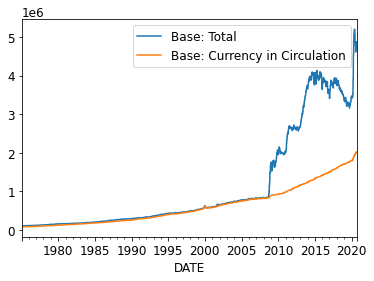

In [3]:
#fedProject.py
from datlib.plots import *
from datlib.FRED import *
# vars in millions of dollars
data_codes = {"Base: Total":"BOGMBASEW", "Base: Currency in Circulation":"MBCURRCIRW"}
start = datetime.datetime(1975, 1, 12) #This is about as far back as the set goes
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, 
                   start = start,
                  end = end,
                  freq = "W") #Weekly Frequncy
plt.rcParams.update({"font.size":12})
data.plot.line()

Interesting, starting in about 2008 and the global financial crisis, the monetary base increased, but most of it didn't trickle out into circulation.

In [4]:
data

,Base: Total,Base: Currency in Circulation
DATE,,
1975-01-19,107891.0,78245.0
1975-01-26,107988.0,77505.0
1975-02-02,106358.0,76749.0
1975-02-09,106061.0,76530.0
1975-02-16,105693.0,77119.0
...,...,...
2020-08-16,4750981.0,1999857.0
2020-08-23,4830999.0,2009260.0
2020-08-30,4830999.0,2009260.0


Because we associated years with colors, there are some more interesting and unique visualization we can make. This shows color as time on the plotline (dark to light representing times passage), the monetary base on the horizontal axis, and the money in circulation on the verticle. 

Note: It's interesting that until about 2005, the relationship between base money and circulated money is linear. After that, the direct relationship is less clean.

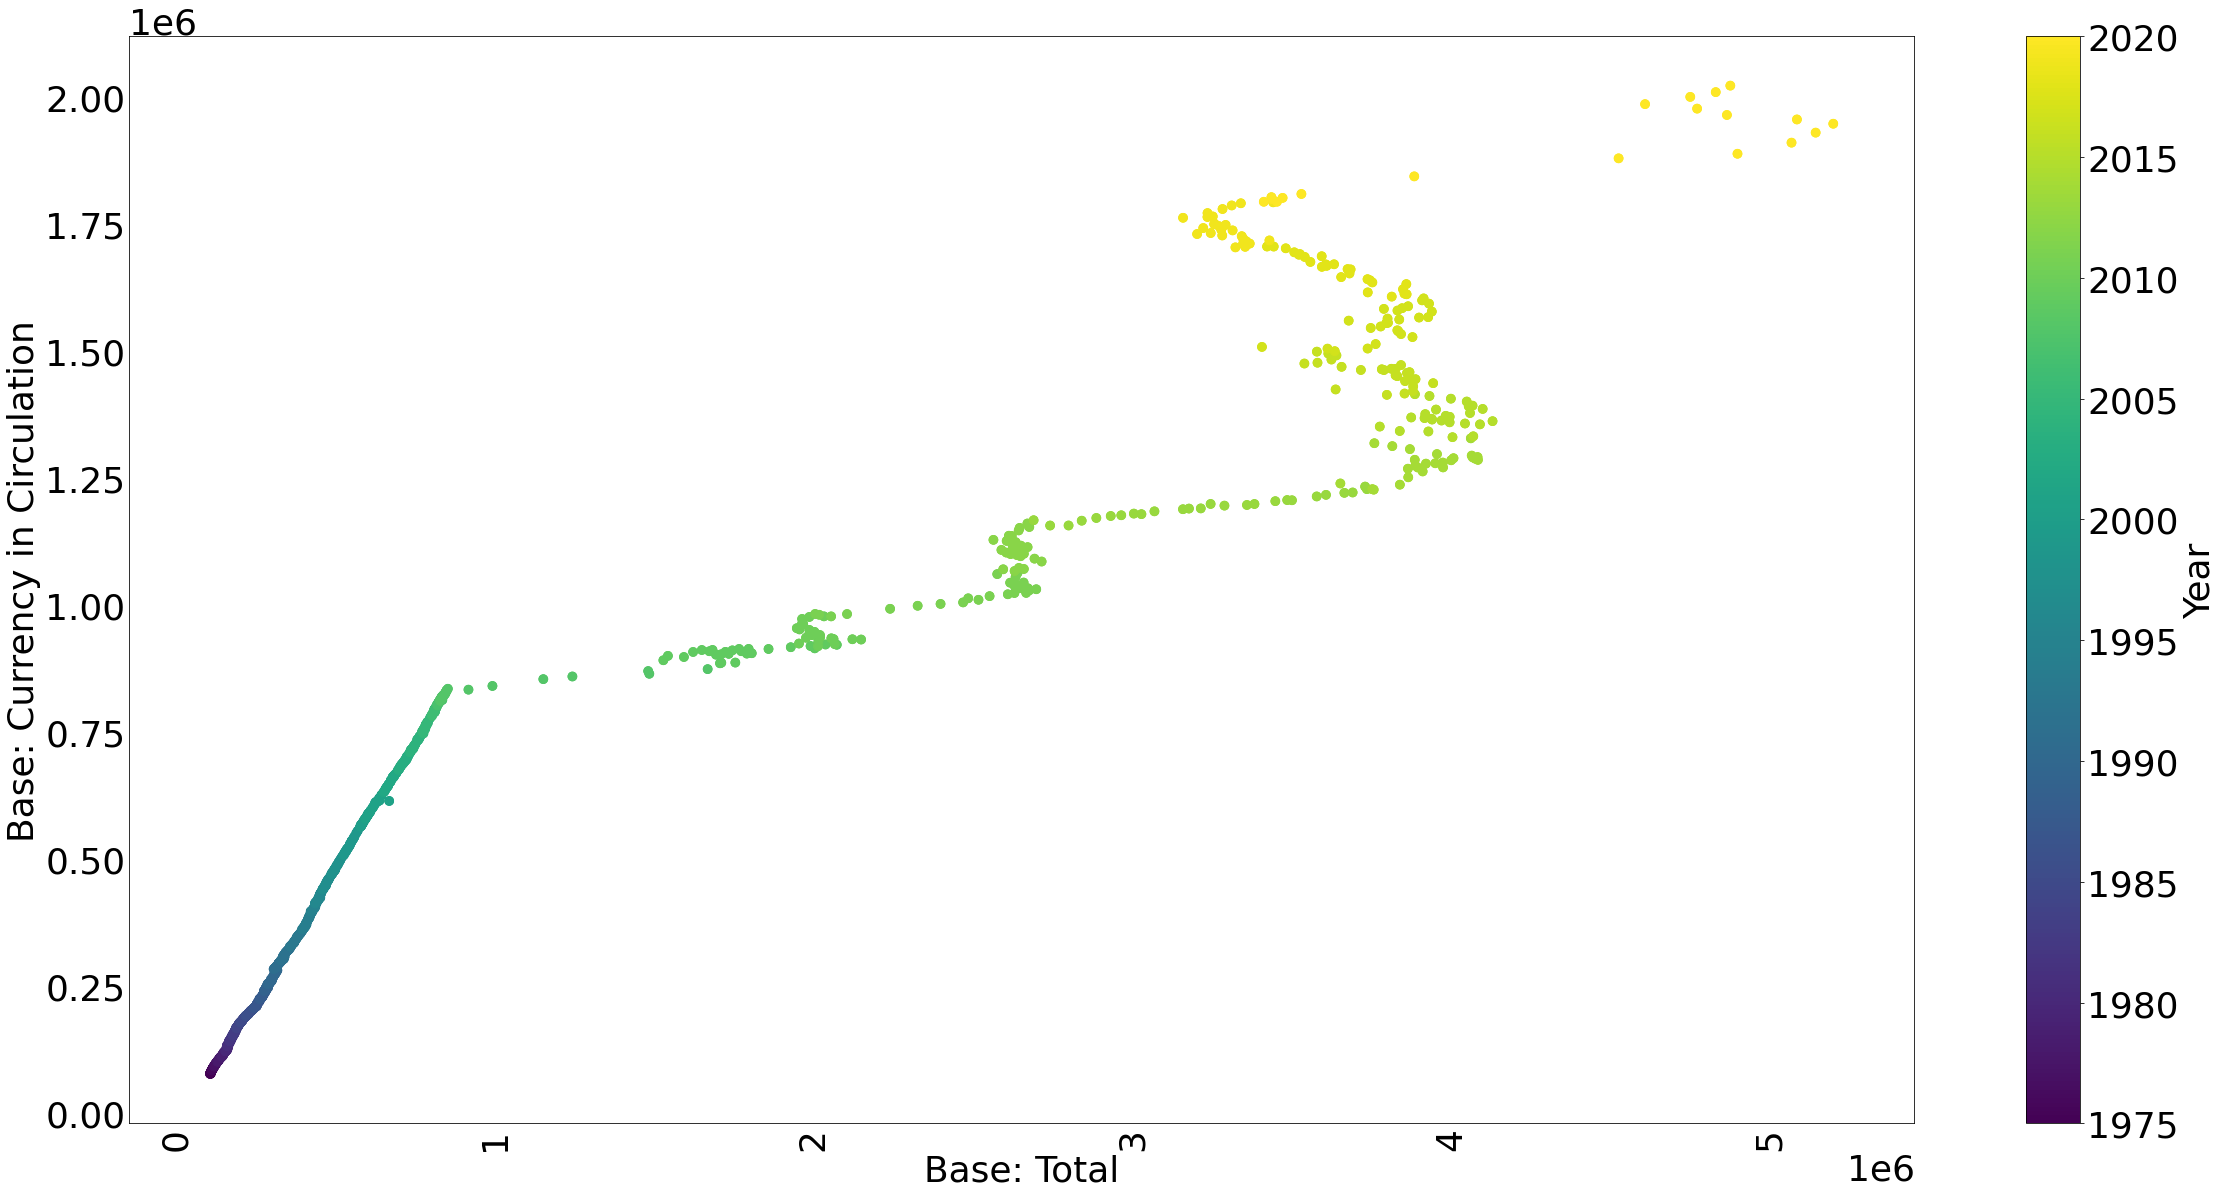

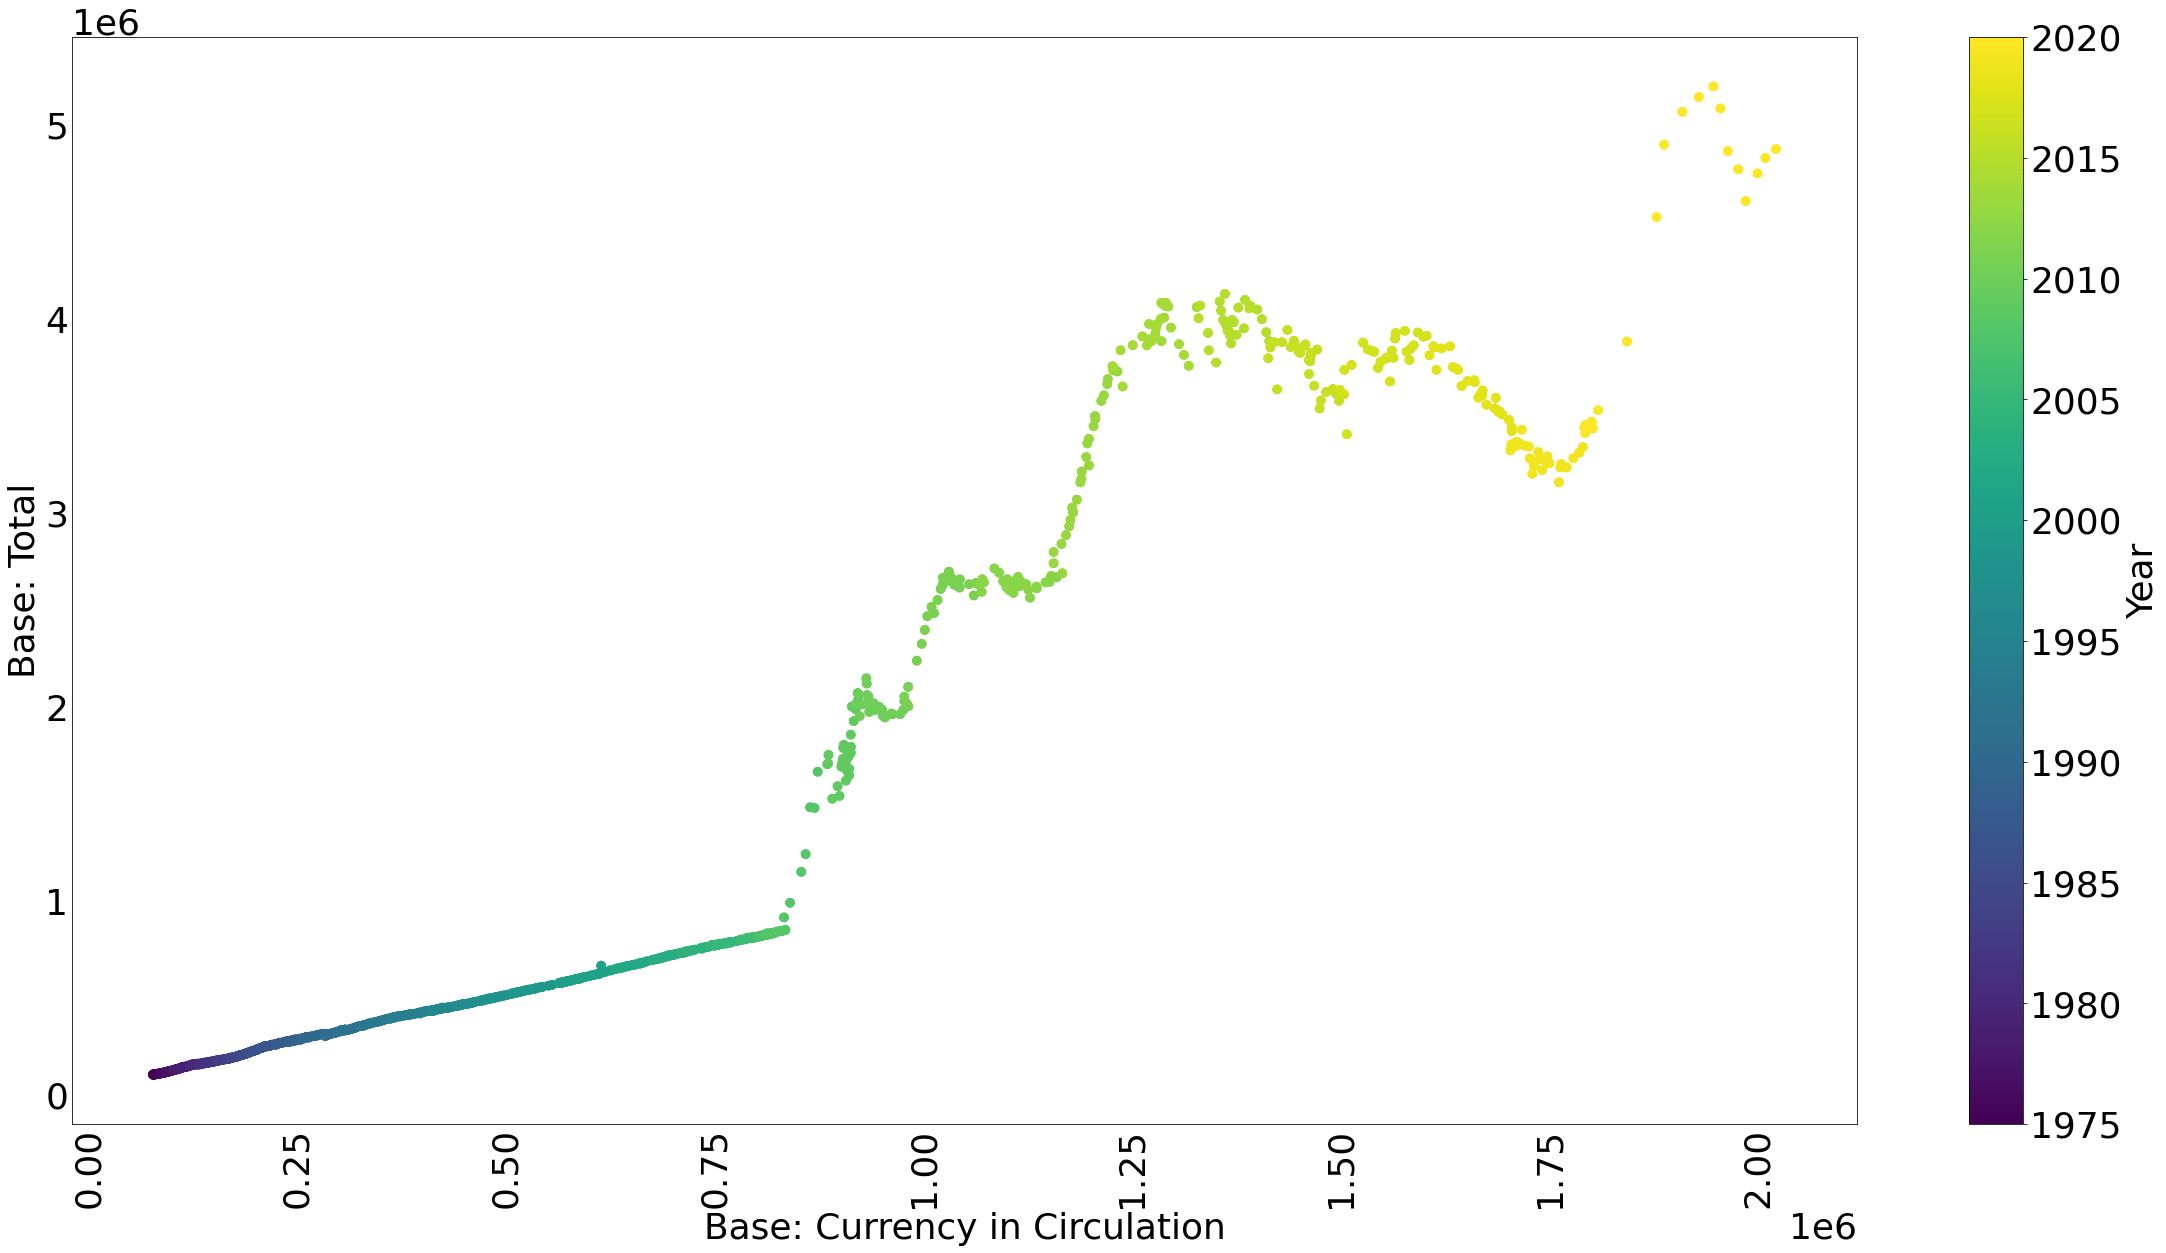

In [5]:
plt.rcParams.update({"font.size":36})
plot_ts_scatter(data)

## Application: The Fed's Balance Sheet Over Time

The Federal Reserve is the central bank of the United States. Like all banks, the Federal Reserve has a balance sheet that contains aassets and liabililities. Assets are things the Federal Reserve owns or generates an income stream, whereas a liability is what it owes and does not generate an income stream.

Traditionally, the Federal Reserve has purchased US Treasury Bonds. However, since the 2008 financial crisis, the Federal Reserve has greatly expanded the domain of what securities it holds.

The Federal Reserve has also tended to issue Federal Reserve notes as liabilities. Now the Federal Reserve offers a variety of deposit accounts that holds as liabilities.

We will download many of the largest categories of the Fed's assets and liabilities and build functions to visualize them over time.


In [6]:
def bil_to_mil(series):
    #Some of the units are in millions, so we tranform them to billions
    return series * 10 ** 3

In [7]:
#fedproject

data_codes = {"Base: Total ($ Mil)": "BOGMBASEW",
              "Base: Currency in Circulation ($ Mil)": "MBCURRCIRW",
              
              # Assets
               "Balance Sheet: Total Assets ($ Mil)": "WALCL",
               "Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)": "WSRLL",
               "Balance Sheet: Securities Held Outright ($ Mil)": "WSHOSHO",
              
              ### breakdown of securities holdings ###
               "Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB",
              
              # other forms of lending
               "Balance Sheet: Repos ($ Mil)": "WORAL",
               "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
               "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL",

              # unamortized value of securities held 
               "Balance Sheet: Unamortized Security Premiums ($ Mil)": "WUPSHO",

              # Liabilities
               "Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
               "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
               "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL",
              # Reserves 
               "Balance Sheet: Excess Reserves ($ Mil)": "EXCSRESNW",
               "Balance Sheet: Required Reserves ($ Mil)": "RESBALREQW",
               "Balance Sheet: Total Reserves ($ Mil)": "WRESBAL",
              ## Major share of depsotis
               "Balance Sheet: Deposits from Dep. Institutions ($ Mil)":"WLODLL",
               "Balance Sheet: U.S. Treasury General Account ($ Mil)": "WDTGAL",
               "Balance Sheet: Other Deposits ($ Mil)": "WOTHLB",
               "Balance Sheet: All Deposits ($ Mil)": "WLDLCL",
              
               # Interest Rates
               "Federal Funds Target (Pre-Crisis)": "DFEDTAR",
               "Federal Funds (Upper) Target":"DFEDTARU",
               "Effective Federal Funds Rate":"DFF",
               "Interest on Excess Reserves":"IOER",
              
               # Req Reserves and Vault Cash
               "Vault Cash ($ Mil)": "TLVAULTW",
               "Vault Cash Used as Req. ($ Mil)": "VAULT",
               }

start = datetime.datetime(2002, 12, 1)
end = datetime.datetime.today()

data = gather_data(data_codes = data_codes, start = start,
                  end = end, freq = "M")

In [8]:
bil_to_mil_list = ["Balance Sheet: Total Reserves ($ Mil)", "Balance Sheet: Other Deposits ($ Mil)"]
for key in bil_to_mil_list:
    data[key] = bil_to_mil(data[key])

In [9]:
data

,Base: Total ($ Mil),Base: Currency in Circulation ($ Mil),Balance Sheet: Total Assets ($ Mil),"Balance Sheet Securities, Prem-Disc, Repos, and Loans ($ Mil)",Balance Sheet: Securities Held Outright ($ Mil),Balance Sheet: U.S. Treasuries Held Outright ($ Mil),Balance Sheet: Federal Agency Debt Securities ($ Mil),Balance Sheet: Mortgage-Backed Securities ($ Mil),Balance Sheet: Repos ($ Mil),Balance Sheet: Central Bank Liquidity Swaps ($ Mil),...,Balance Sheet: Deposits from Dep. Institutions ($ Mil),Balance Sheet: U.S. Treasury General Account ($ Mil),Balance Sheet: Other Deposits ($ Mil),Balance Sheet: All Deposits ($ Mil),Federal Funds Target (Pre-Crisis),Federal Funds (Upper) Target,Effective Federal Funds Rate,Interest on Excess Reserves,Vault Cash ($ Mil),Vault Cash Used as Req. ($ Mil)
DATE,,,,,,,,,,,,,,,,,,,,,
2002-12-31,697517.00,676472.50,725800.50,672844.50,629409.50,629399.50,10.0,0.00,33625.0,0.00,...,21322.00,5628.5,214.50,27313.50,1.25,NaN,1.238387,NaN,42821.50,30.347
2003-01-31,700446.80,679511.20,724718.40,671196.20,629416.00,629406.00,10.0,0.00,32100.0,0.00,...,26136.80,5650.2,268.60,32360.20,1.25,NaN,1.235161,NaN,45800.60,32.794
2003-02-28,700362.25,679723.75,721326.00,668666.25,631911.75,631901.75,10.0,0.00,27185.5,0.00,...,23256.25,4637.0,240.75,28276.25,1.25,NaN,1.262143,NaN,46343.75,32.082
2003-03-31,704898.00,683568.25,723651.25,672446.00,639168.25,639158.25,10.0,0.00,23625.0,0.00,...,22239.00,4952.5,222.75,27551.75,1.25,NaN,1.252903,NaN,42882.25,30.760
2003-04-30,709173.00,686919.20,736926.40,685518.60,645508.60,645498.60,10.0,0.00,30350.2,0.00,...,25664.80,8352.0,261.00,34412.60,1.25,NaN,1.258000,NaN,42255.80,30.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-31,5139460.00,1928941.25,6947555.25,6413832.00,5843195.25,4069075.50,2347.0,1771773.00,167126.5,445217.00,...,3262736.50,1200408.5,220524.25,4700803.50,NaN,0.25,0.050000,0.1,101417.75,0.000
2020-06-30,5059368.25,1955540.75,7127786.25,6582068.00,6048567.25,4162877.25,2347.0,1883342.75,132026.0,379724.50,...,3113796.25,1521977.5,167910.50,4827411.50,NaN,0.25,0.077667,0.1,103563.50,0.000
2020-07-31,4725875.20,1977793.40,6960429.40,6606989.60,6188826.40,4251449.00,2347.0,1935030.00,12240.6,159764.80,...,2750835.00,1718244.0,167966.00,4643579.00,NaN,0.25,0.092581,0.1,99735.40,0.000


Let's create a basic line graph to plot these values over time.

In [10]:
def plot_lines(df, linewidth = 1, figsize = (40,20), legend = True, pp = None):
    fig, ax = plt.subplots(figsize = figsize)
    df.plot.line(linewidth = linewidth, ax = ax, legend = legend)
    #Rotate the  the text at x axis 
    ax.tick_params(axis = "x", rotation=90)
    #no tick lines
    ax.tick_params("both", length =0, which = "both")
    
    vals = ax.get_yticks()
    vals = [int(x) for x in vals]
    ax.set_yticklabels(vals)
    
    remove_chars = "[]:$'\\"
    filename = str(list(df.keys()))
    for char in remove_chars:
        filename = filename.replace(char, "")
    plt.savefig(filename[:50] + "line.png",
               bbox_inches = "tight")
    if pp != None: pp.savefig(fig, box_inches = "tight")

        

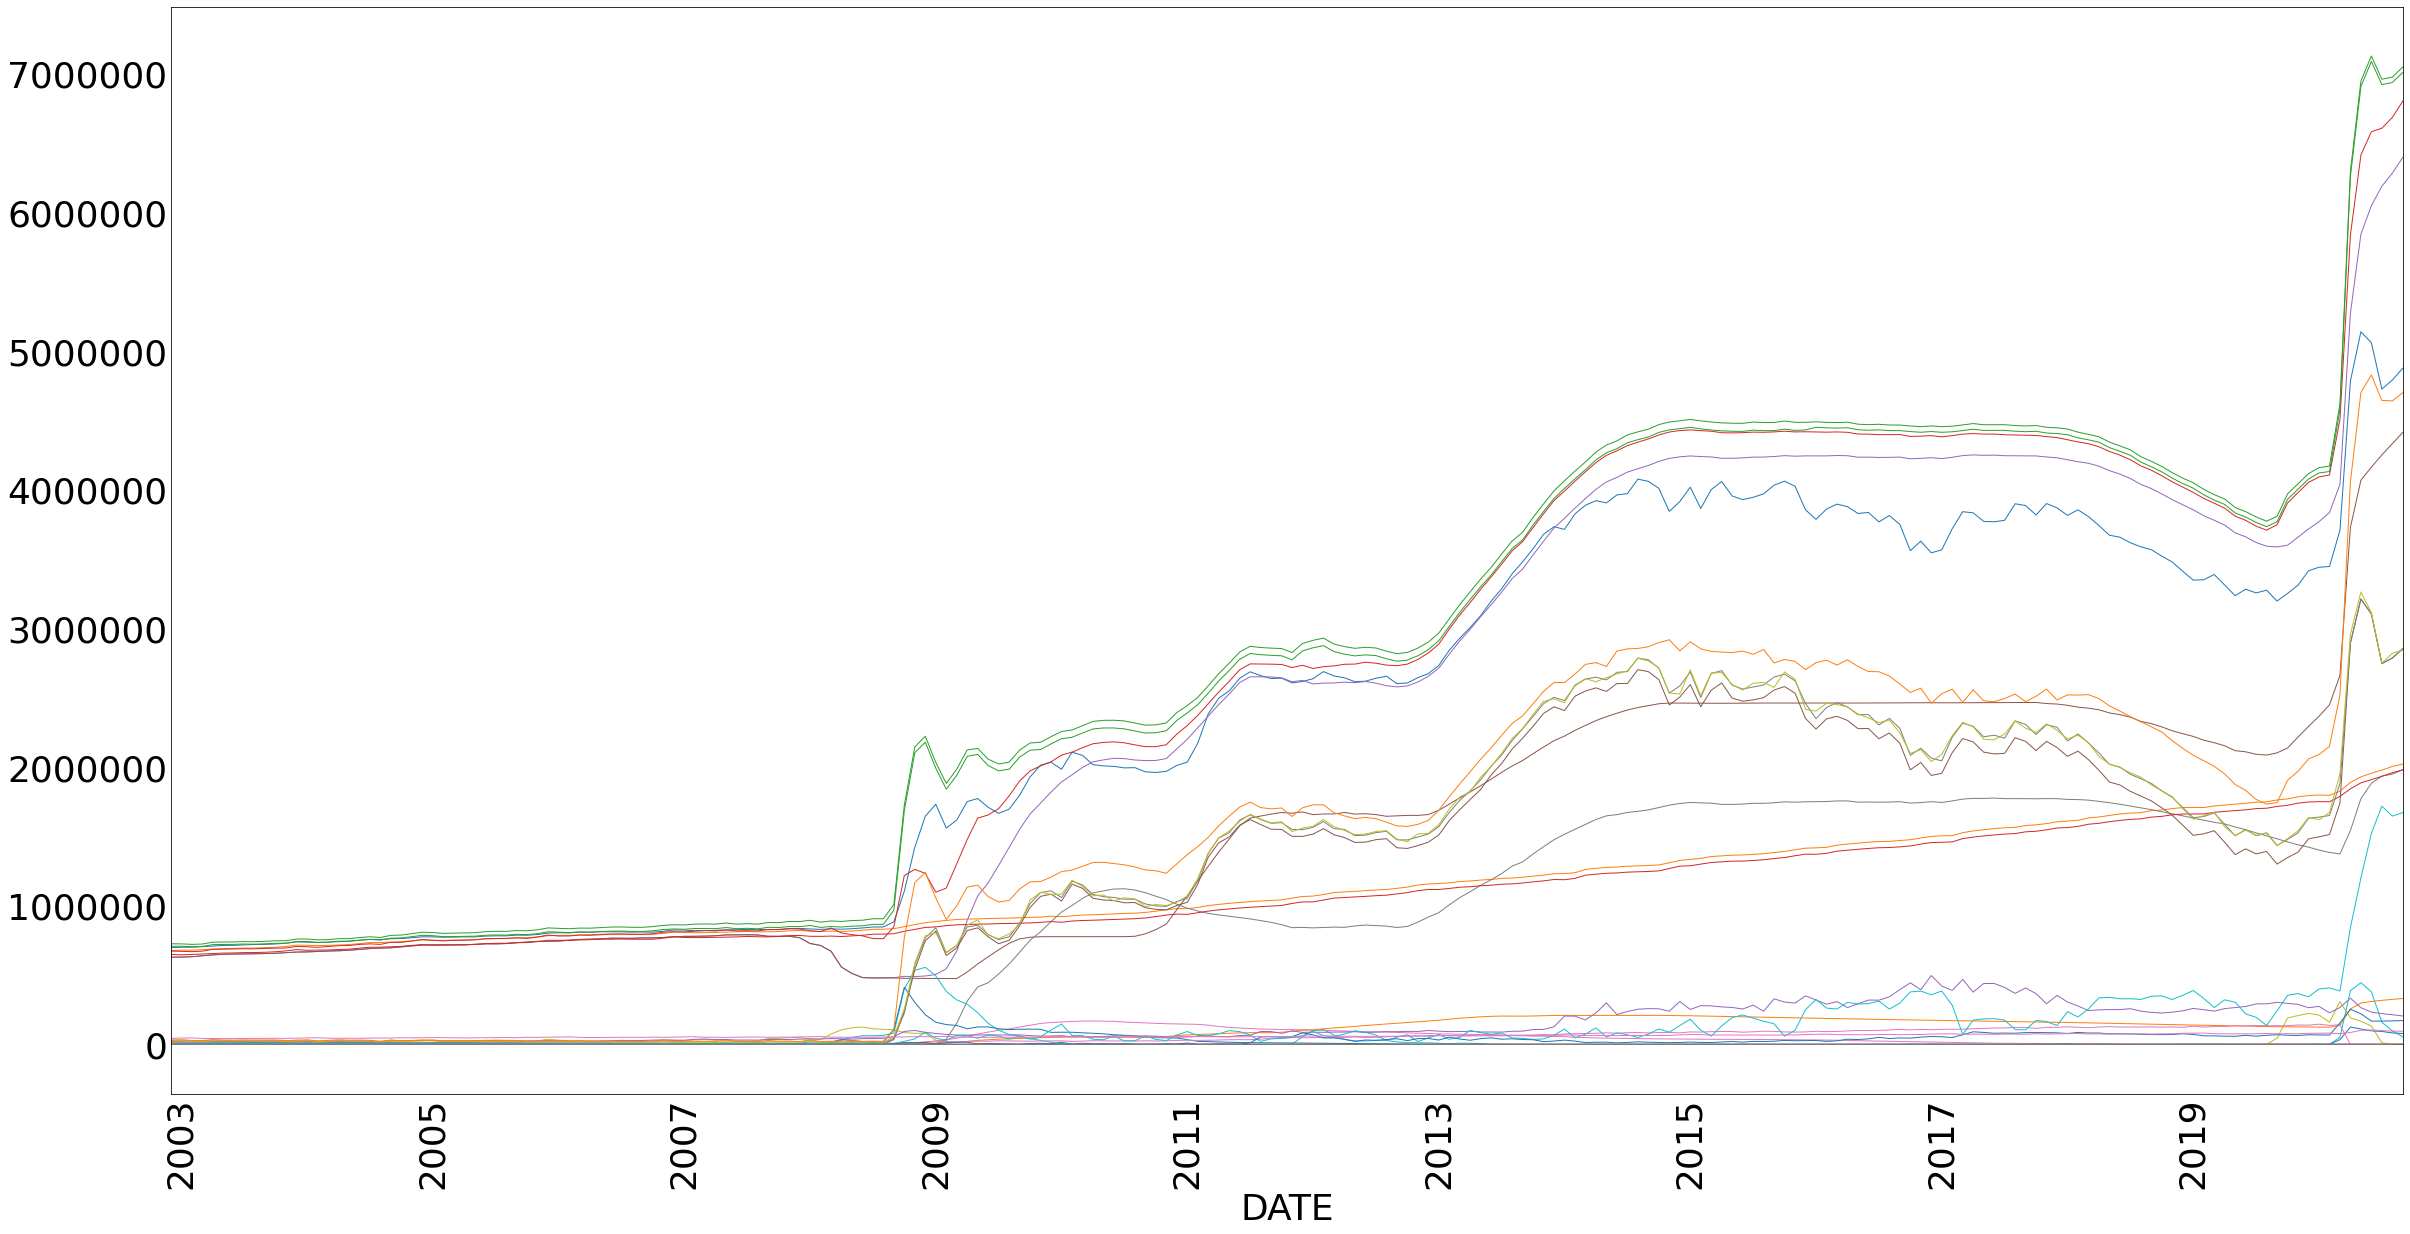

In [11]:
from datlib.plots import *
plot_lines(df = data, linewidth = 1, figsize = (40,20), pp = None, legend = False)

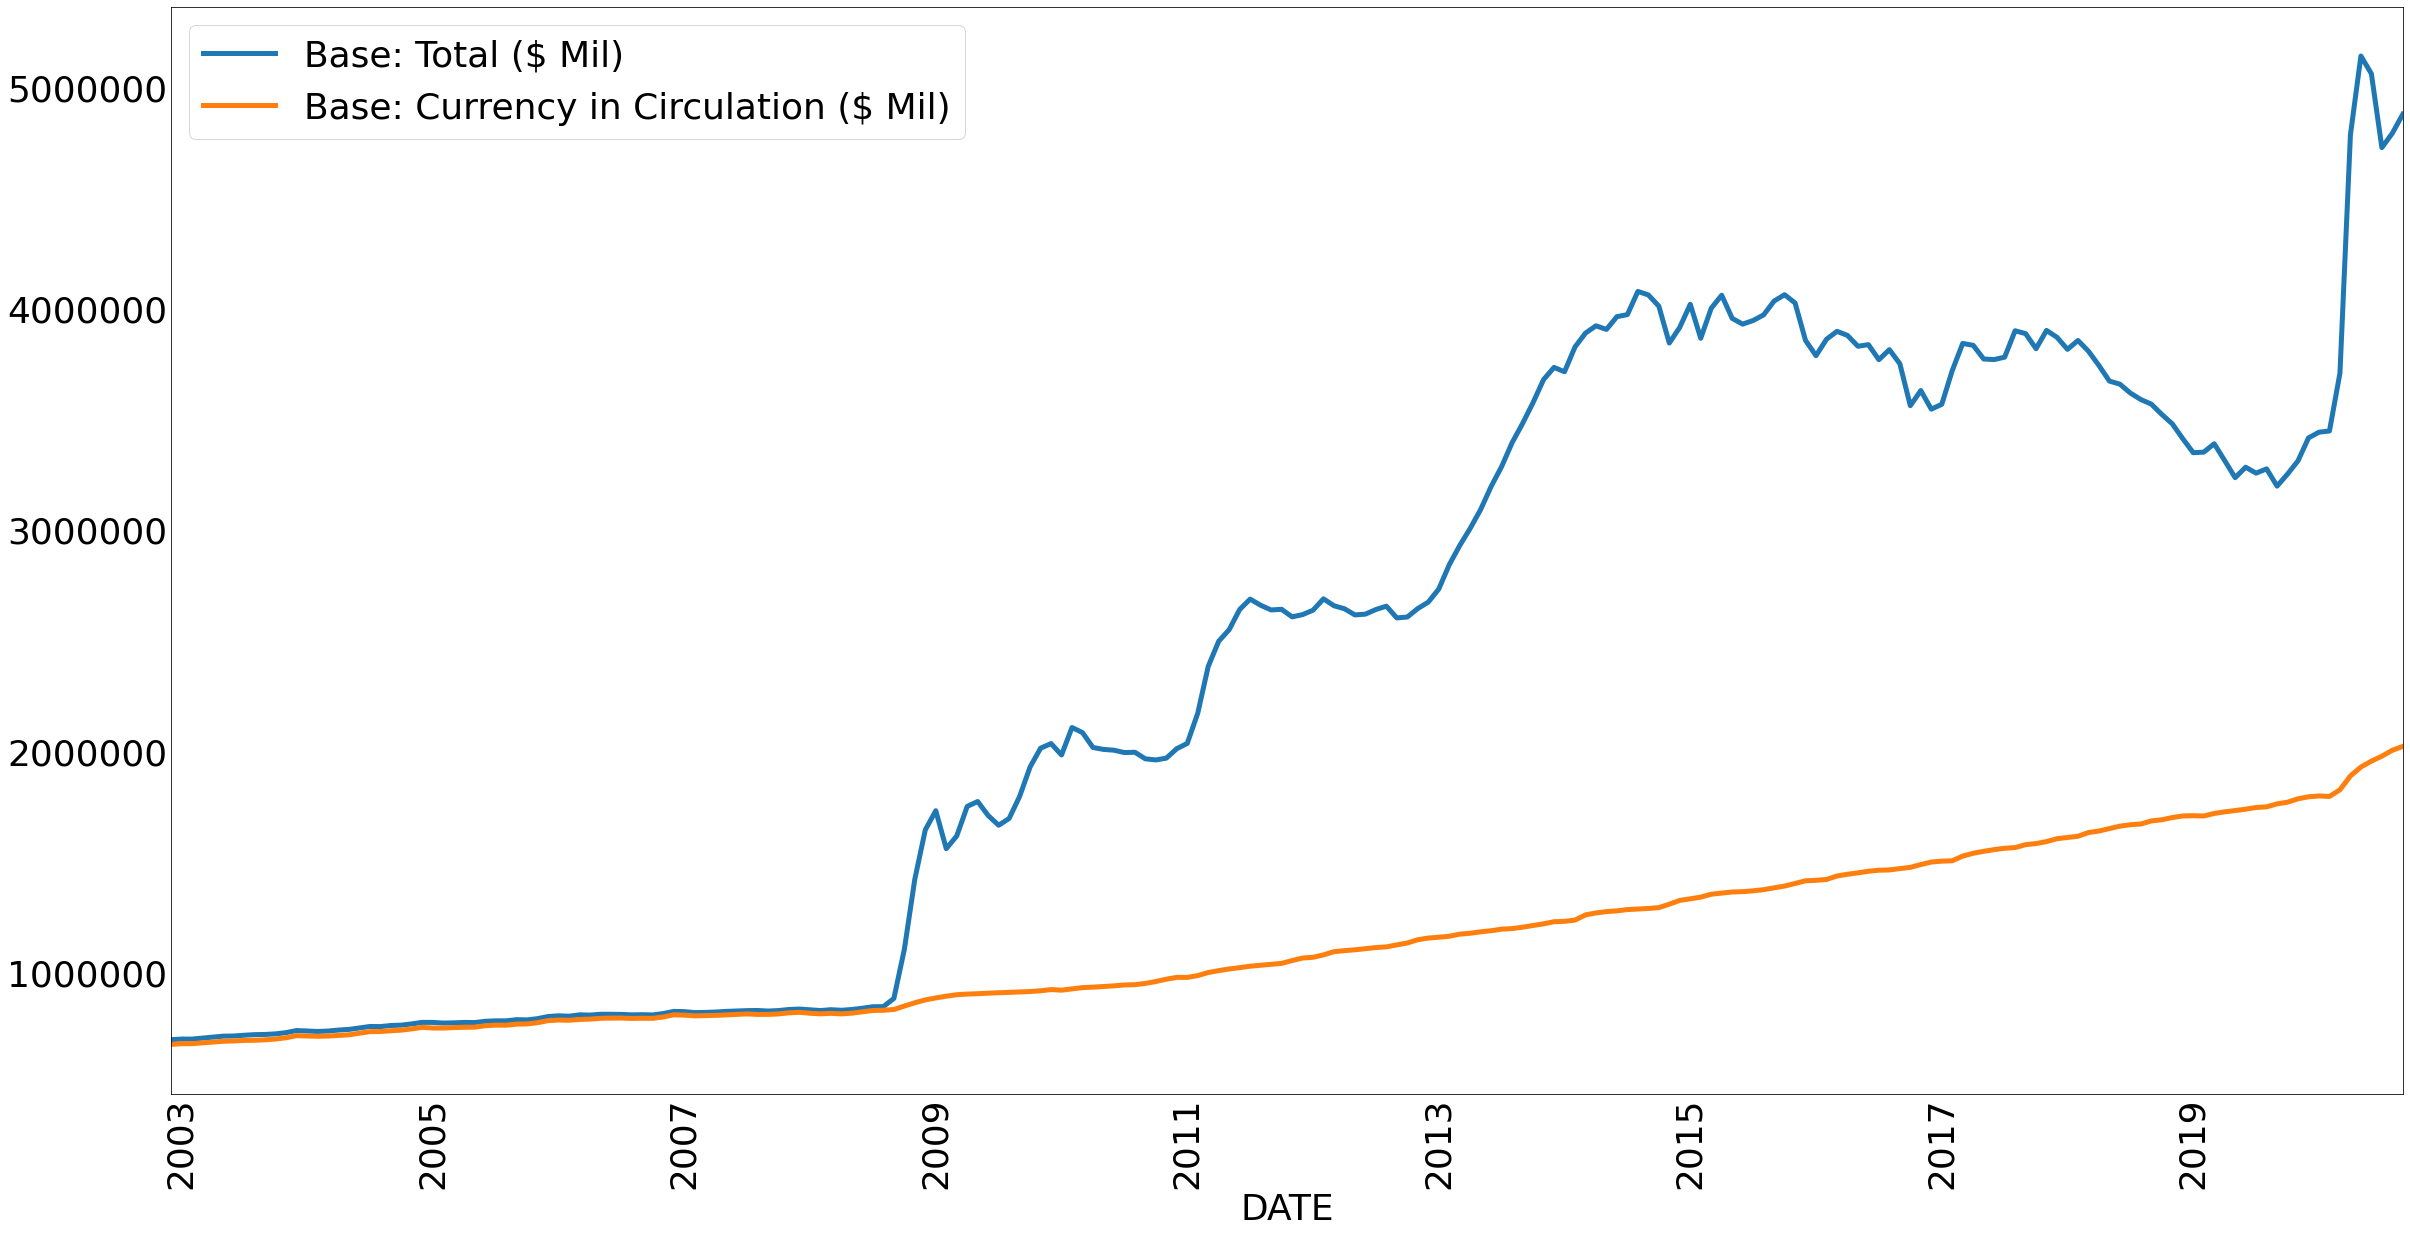

In [12]:
#Ploting the base and currency in circulation

money_vars = ["Base: Total ($ Mil)", "Base: Currency in Circulation ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 5, figsize = (40, 20), pp = None)

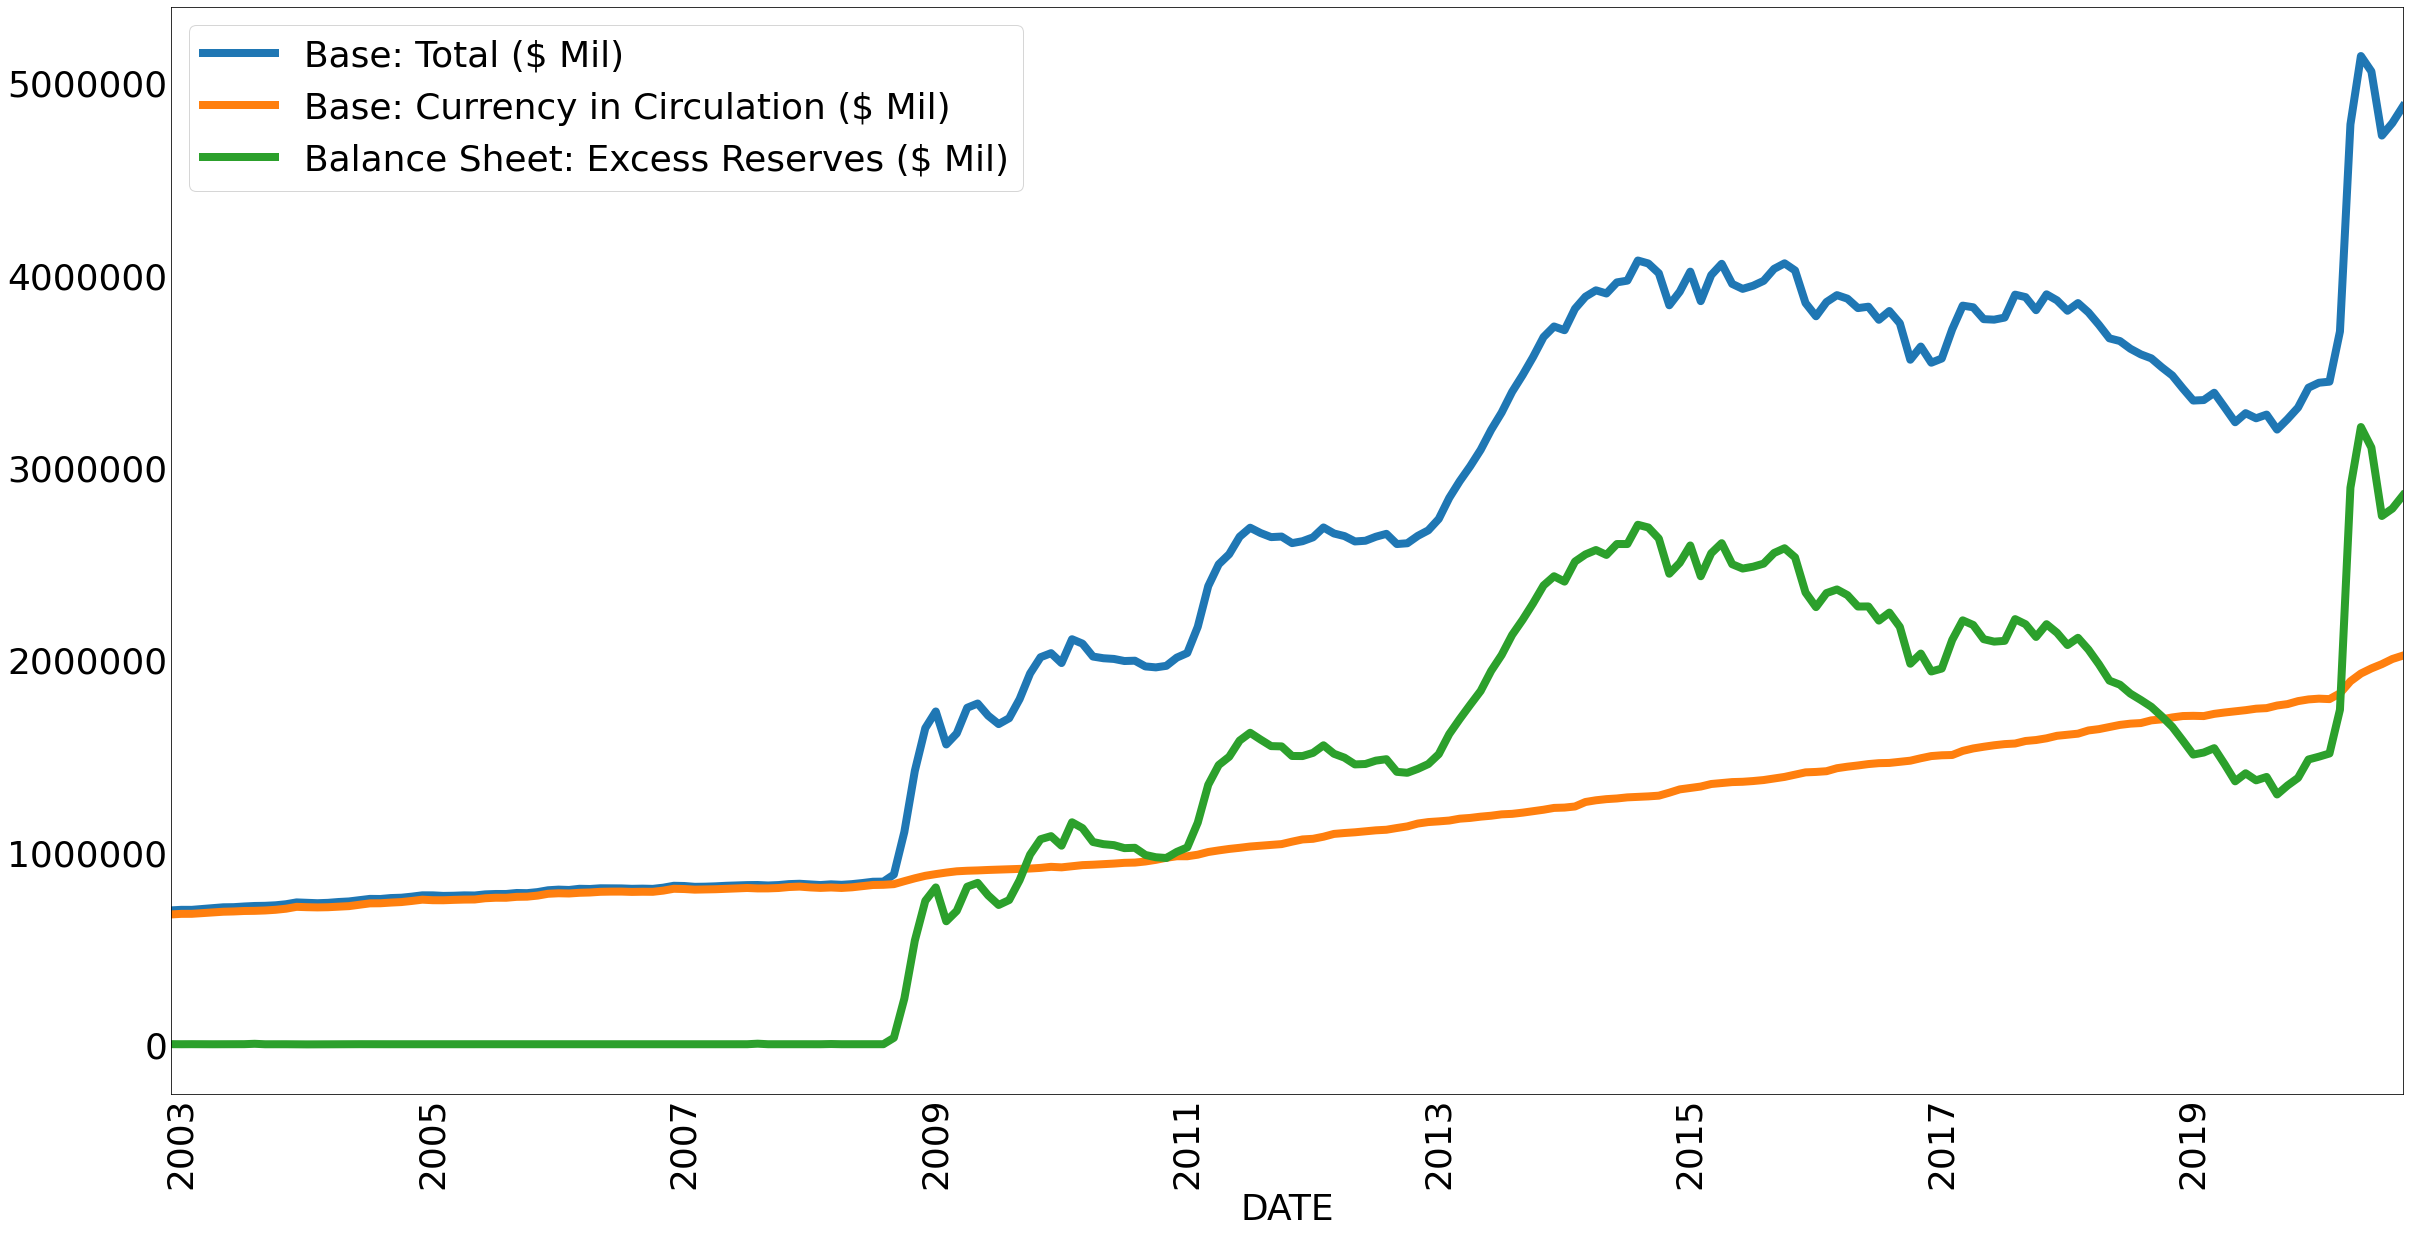

In [13]:
money_vars = ["Base: Total ($ Mil)", "Base: Currency in Circulation ($ Mil)",
             "Balance Sheet: Excess Reserves ($ Mil)"]
plot_lines(df = data[money_vars], linewidth = 8, figsize = (40, 20), pp = None)

## Stacked Plots

It might be useful to plot the area underneath the line rather than the line rather than each point on the line.

In [14]:
def plot_stacked_lines(df, plot_vars, linewidth = 1, figsize = (40, 20), pp = None, total_var = False,
    title = False):
    fig, ax = plt.subplots(figsize = figsize)
    #The key line follows to stack the plot
    df[plot_vars].plot.area(stacked = True, linewidth = linewidth, ax = ax)
    if total_var != False:
        df[total_var].plot.line(linewidth = linewidth, ax = ax, c = "k", label = total_var,
                               ls = "--")
    ax.legend(loc = 2, ncol = 2) #Define the location and number colums
    if title != False:
        plt.title(title)
    

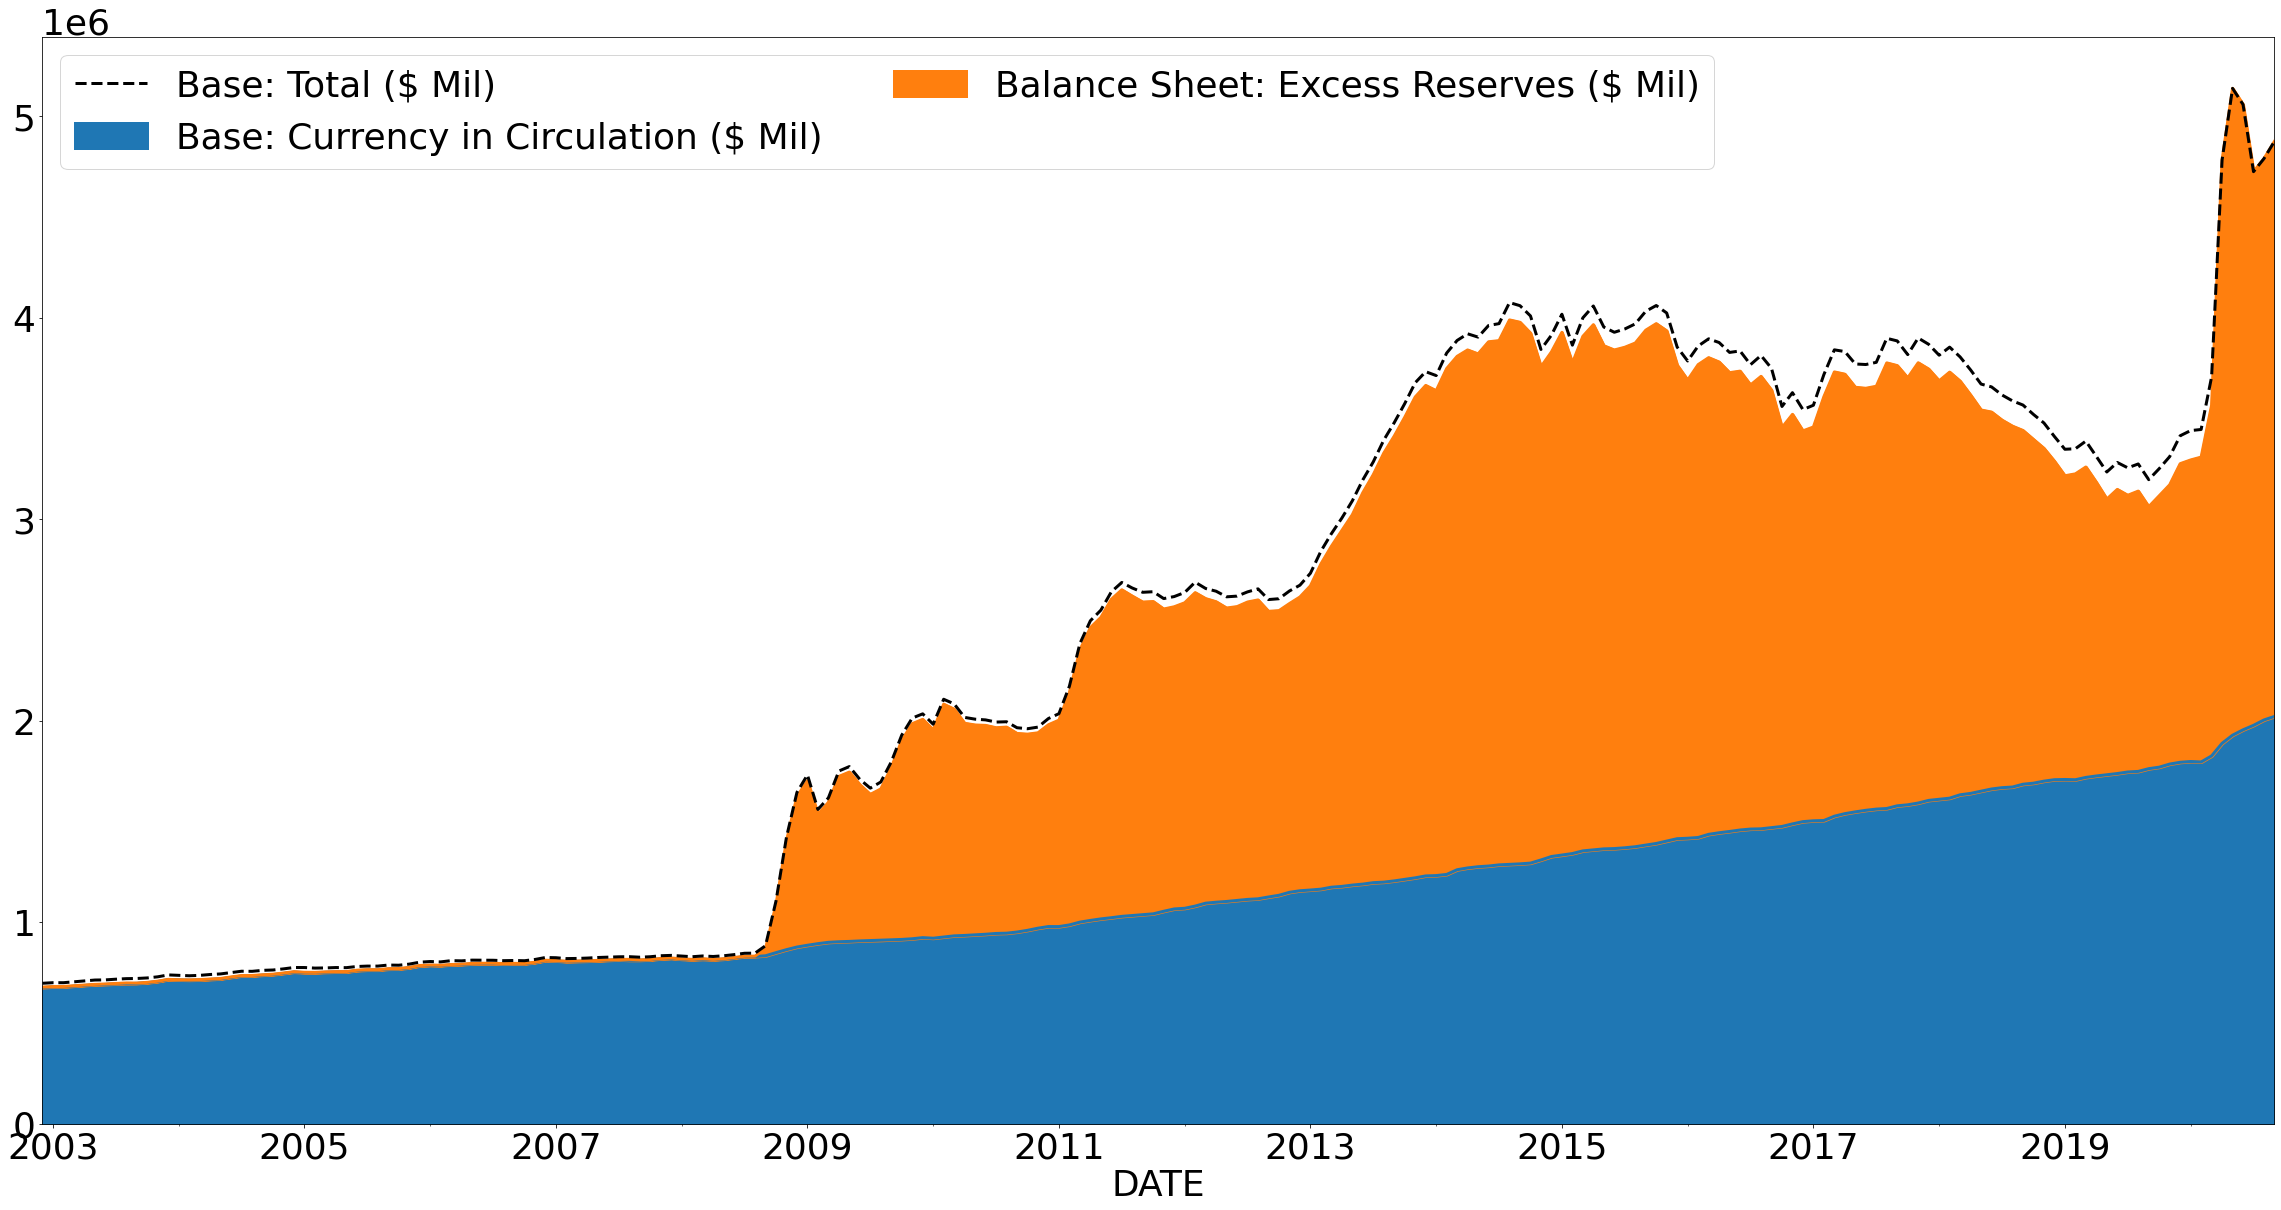

In [15]:
#stacked plot. money_vars selects the variabels we plot

money_vars = ["Base: Currency in Circulation ($ Mil)", "Balance Sheet: Excess Reserves ($ Mil)"]
plot_stacked_lines(data, money_vars, linewidth = 3,
                   total_var = "Base: Total ($ Mil)")

The graph above shows that almost all of the monetary base can be accounted for by the amount of currency in circulation and excess reserves, with the excess reserves accounting for an increased amount post Financial Crisis.

We may also want to look at the levels of required reserves over time.

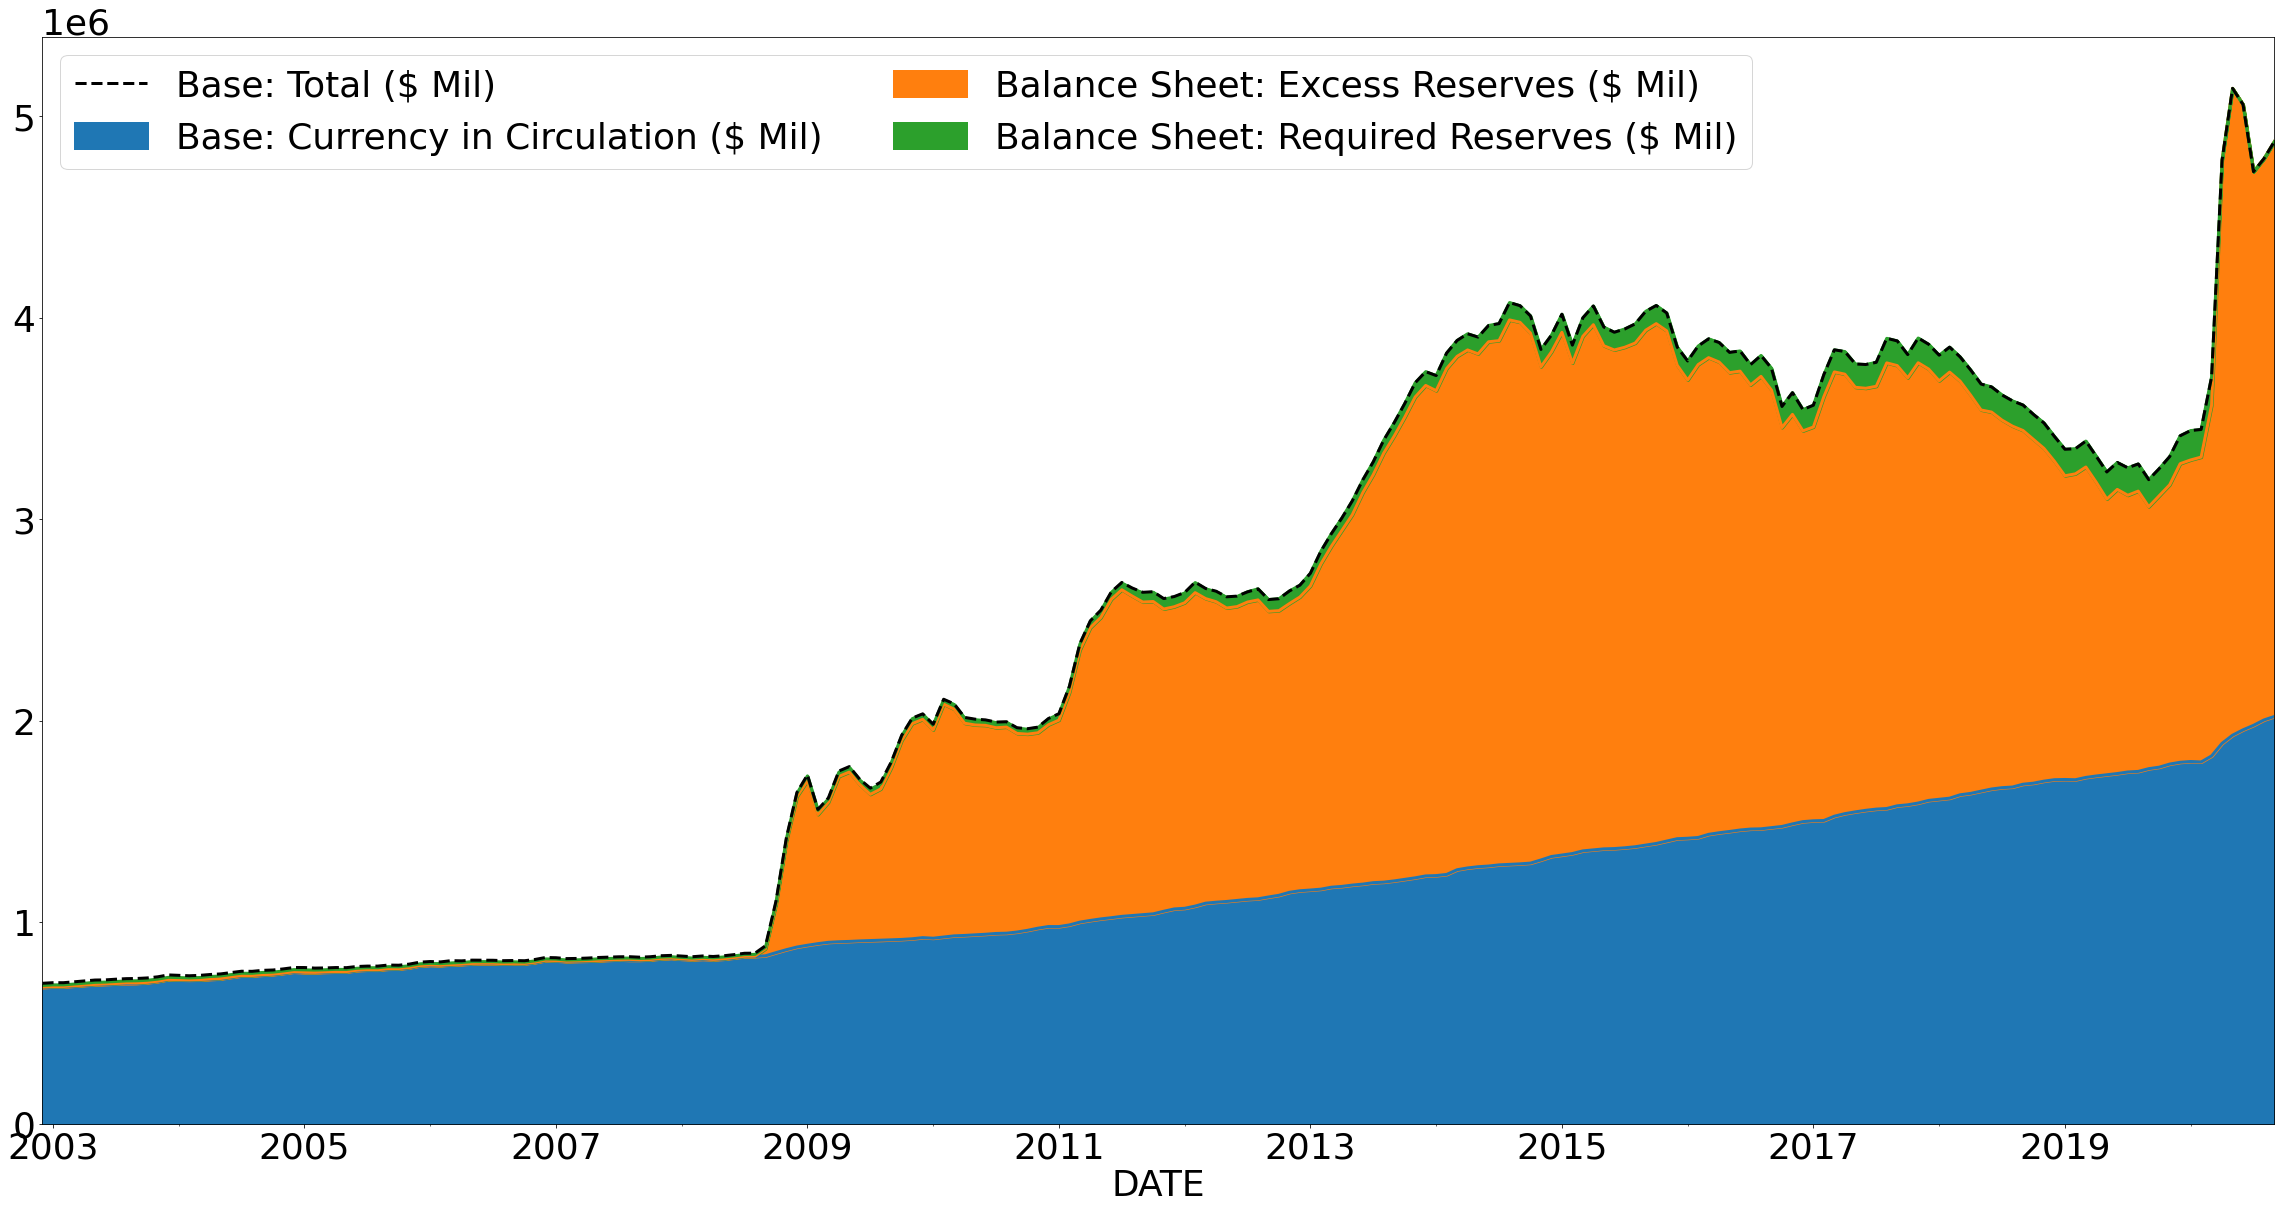

In [16]:
money_vars = ["Base: Currency in Circulation ($ Mil)", "Balance Sheet: Excess Reserves ($ Mil)", "Balance Sheet: Required Reserves ($ Mil)"]
plot_stacked_lines(data, money_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

Next we make a distinction between RRequired Reserves, Required Vault Cash, and Excess Vault cash

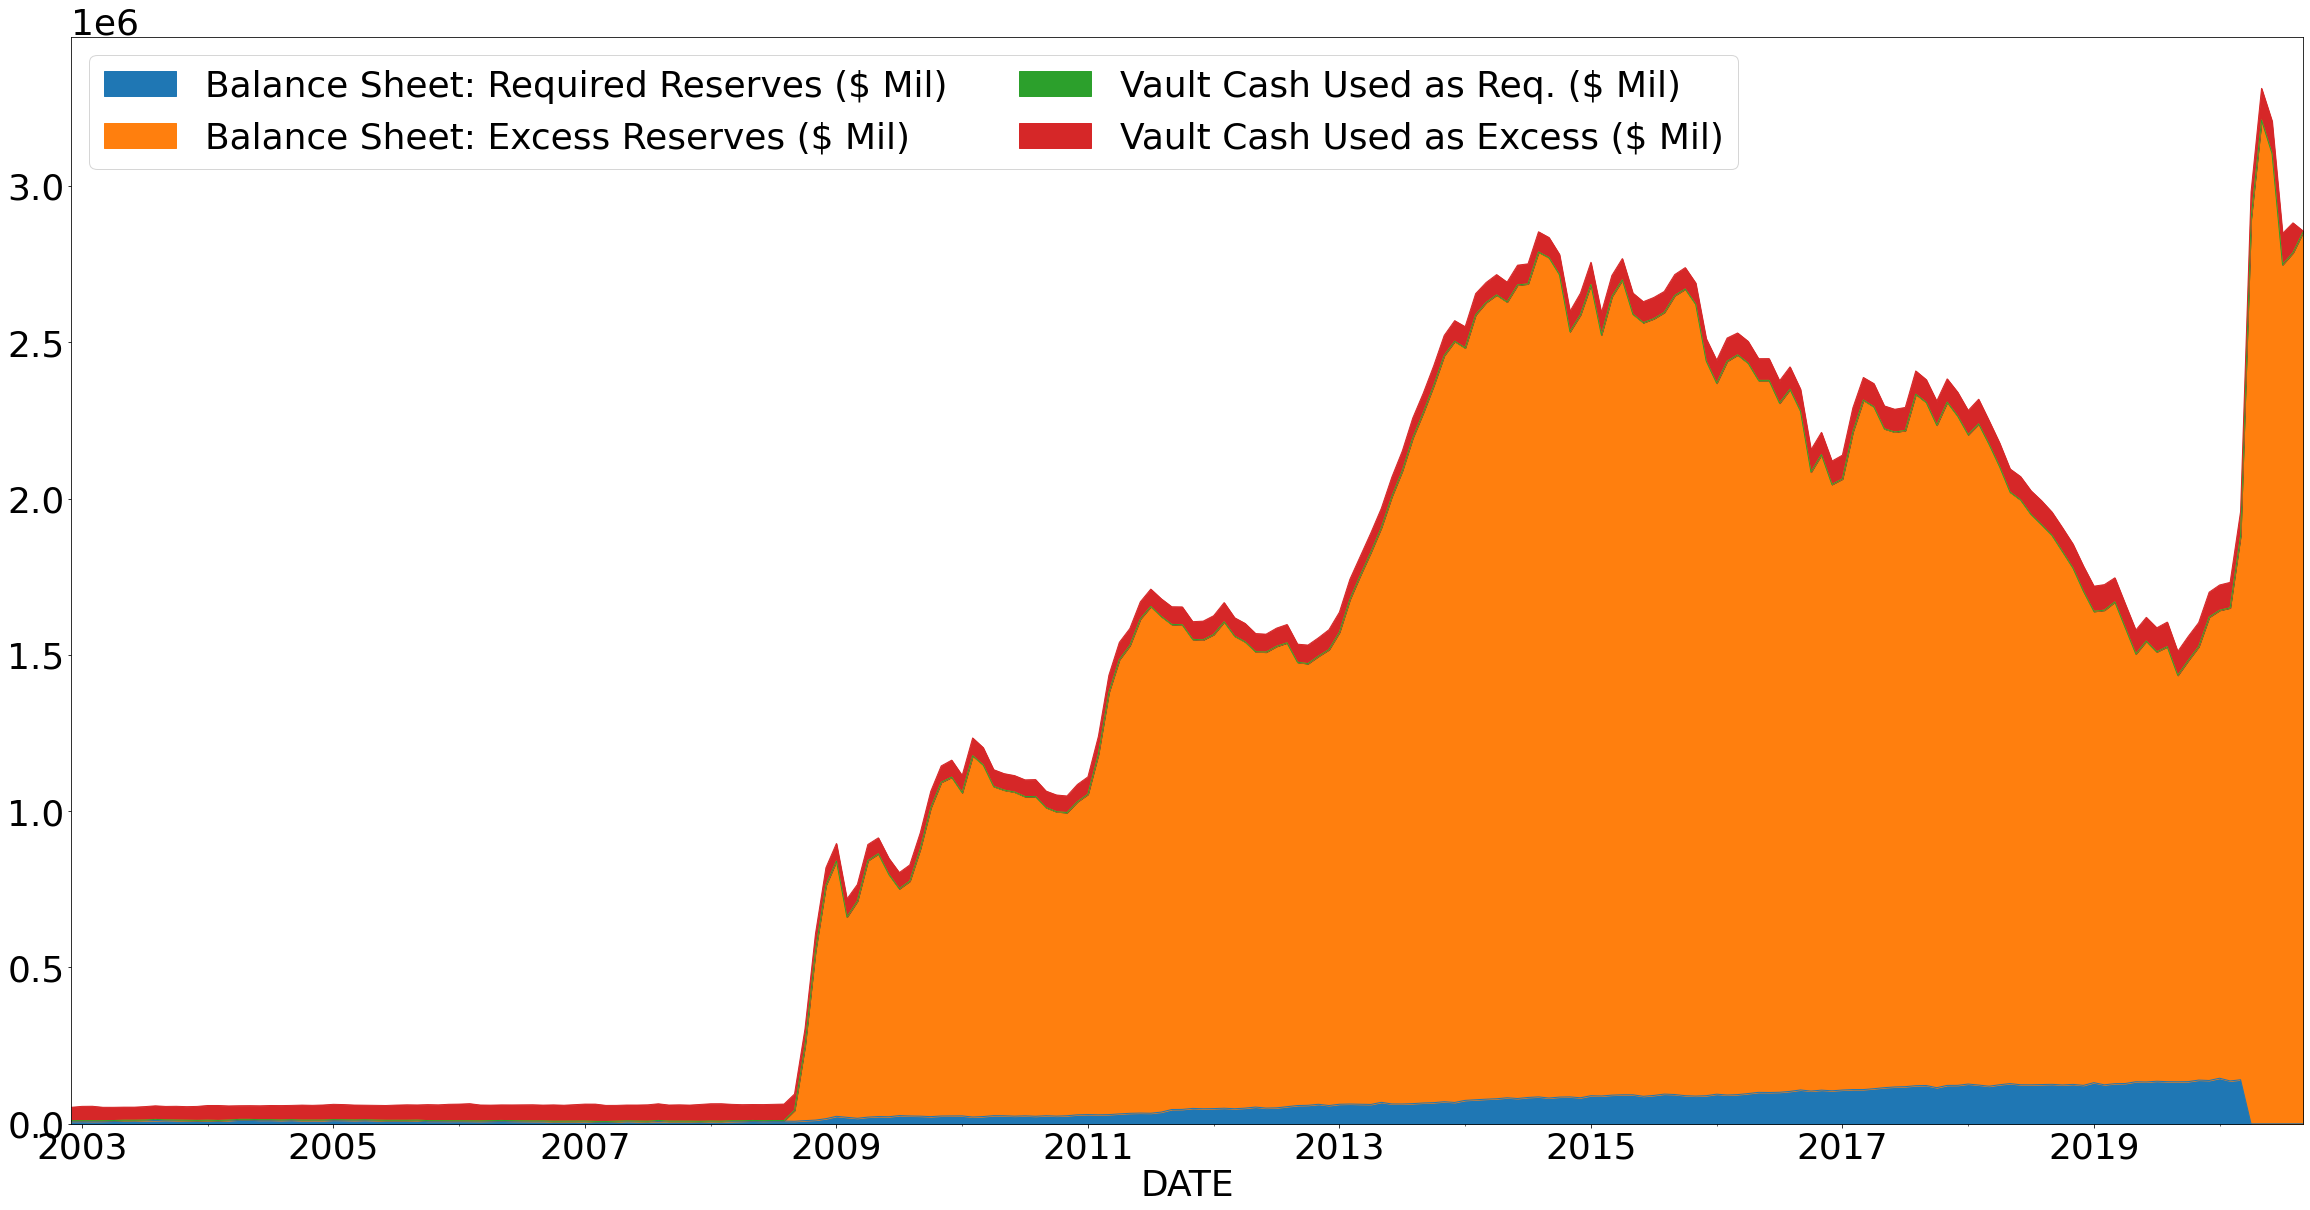

In [17]:
data["Vault Cash Used as Excess ($ Mil)"] = data["Vault Cash ($ Mil)"].sub(
    data["Vault Cash Used as Req. ($ Mil)"])
reserve_vars = ["Balance Sheet: Required Reserves ($ Mil)", "Balance Sheet: Excess Reserves ($ Mil)", "Vault Cash Used as Req. ($ Mil)", "Vault Cash Used as Excess ($ Mil)"]

plot_stacked_lines(data, reserve_vars)



## Assets of the Federal Reserve

Next, we plot the Federal Reserves assets. We see that there is a huge change in the types of securities the Federal Rseserve holds after the 2008 Financial Crisis. Most notably they acquired mortgage backed securities and lent to private banks.

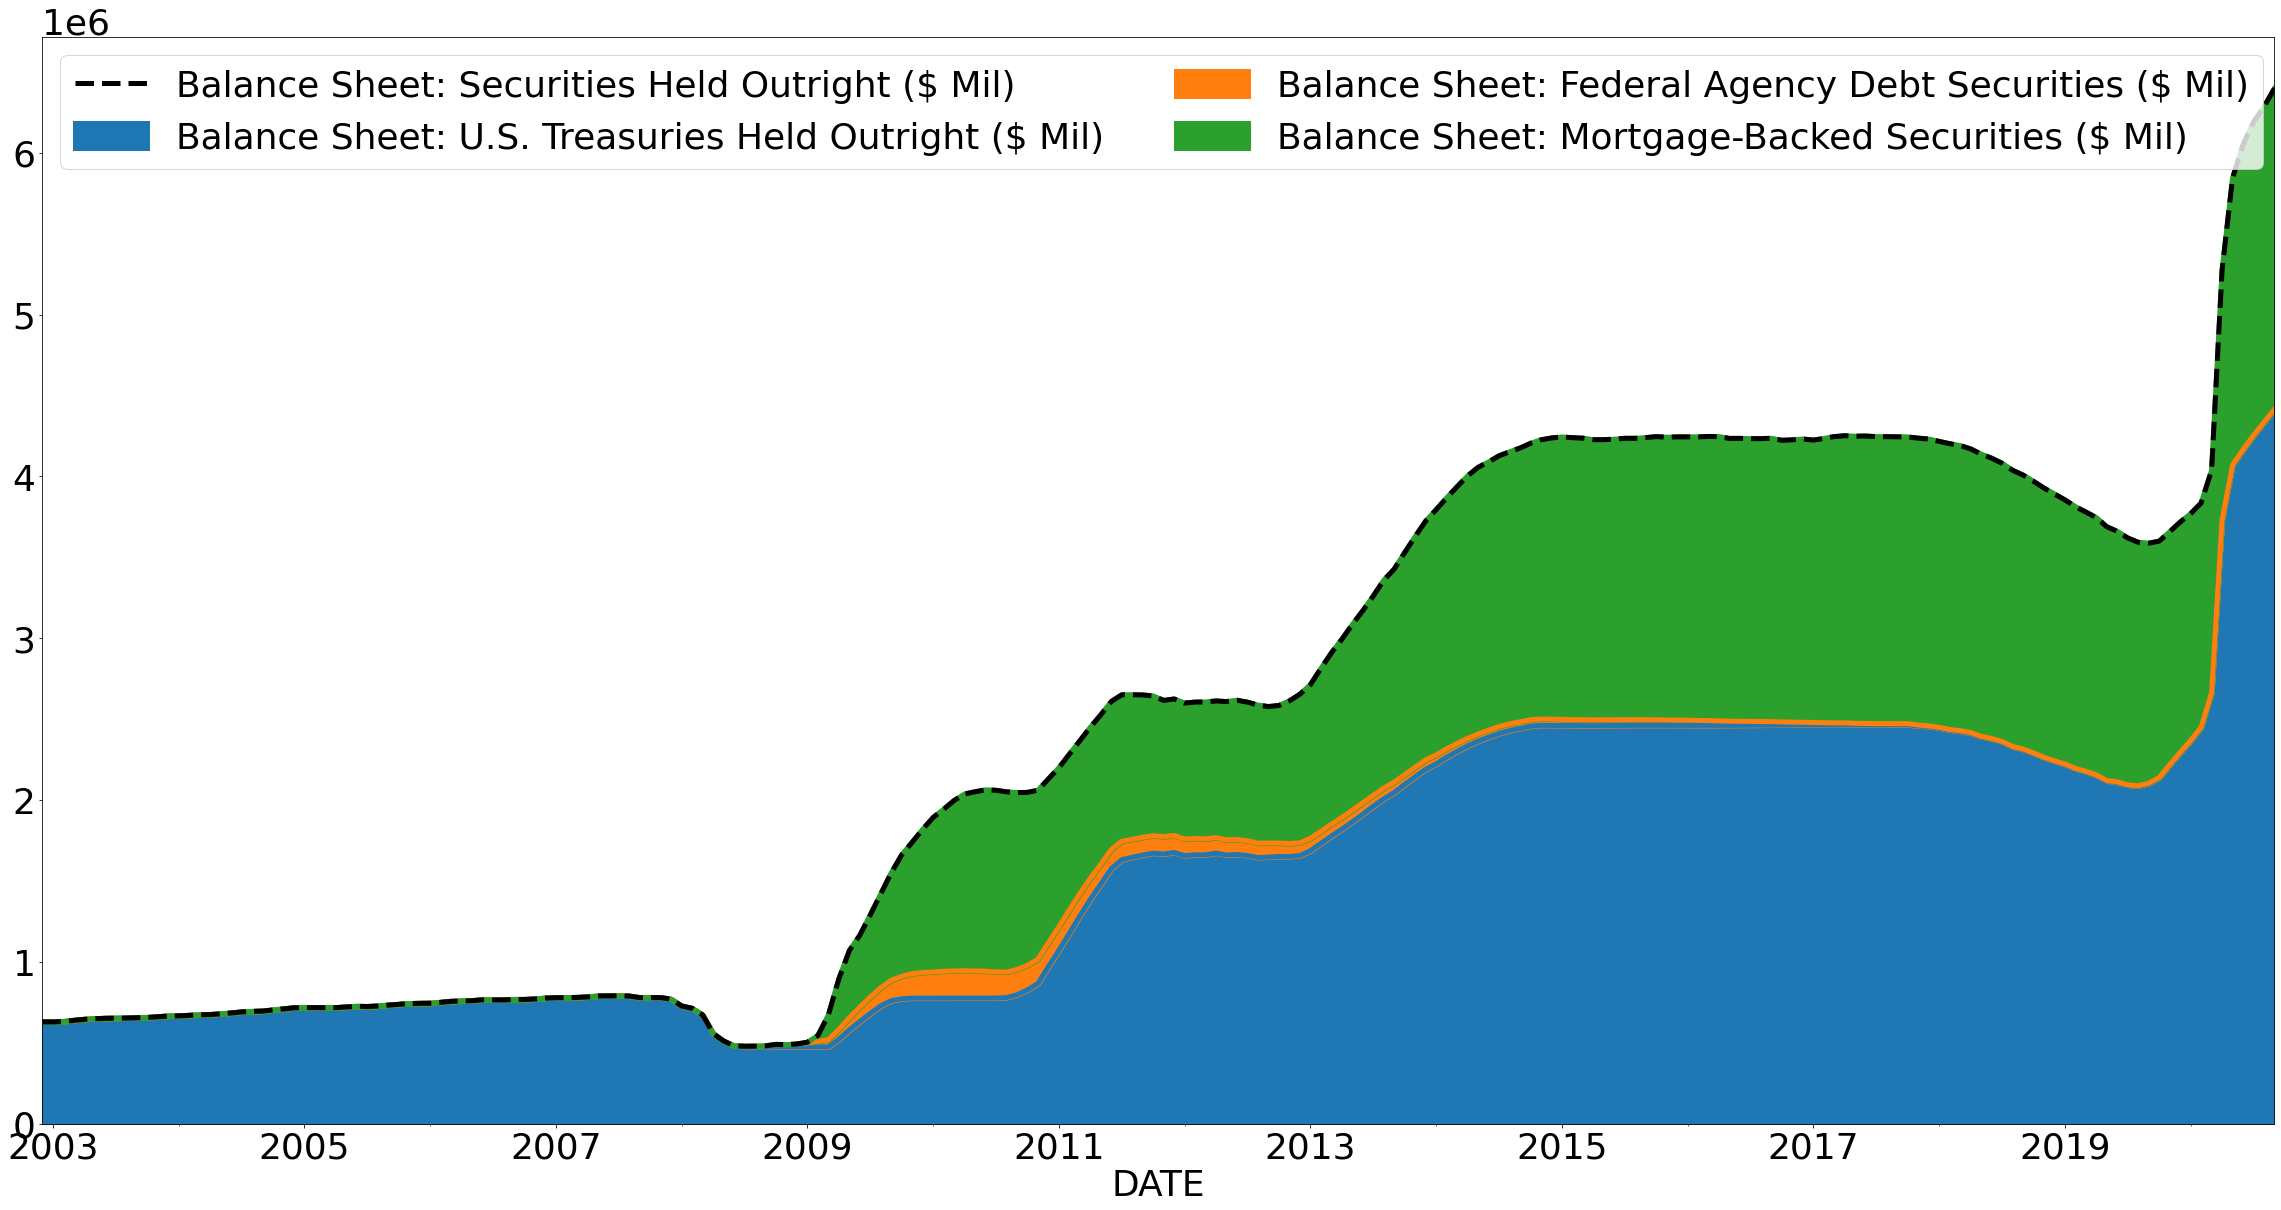

In [18]:
#Once again defining our varibels
account_vars = ["Balance Sheet: U.S. Treasuries Held Outright ($ Mil)",
               "Balance Sheet: Federal Agency Debt Securities ($ Mil)",
               "Balance Sheet: Mortgage-Backed Securities ($ Mil)"]
plot_stacked_lines(data, account_vars, linewidth = 5, total_var = "Balance Sheet: Securities Held Outright ($ Mil)")


Now let's see the composition of the Federal Reserve's assets. 

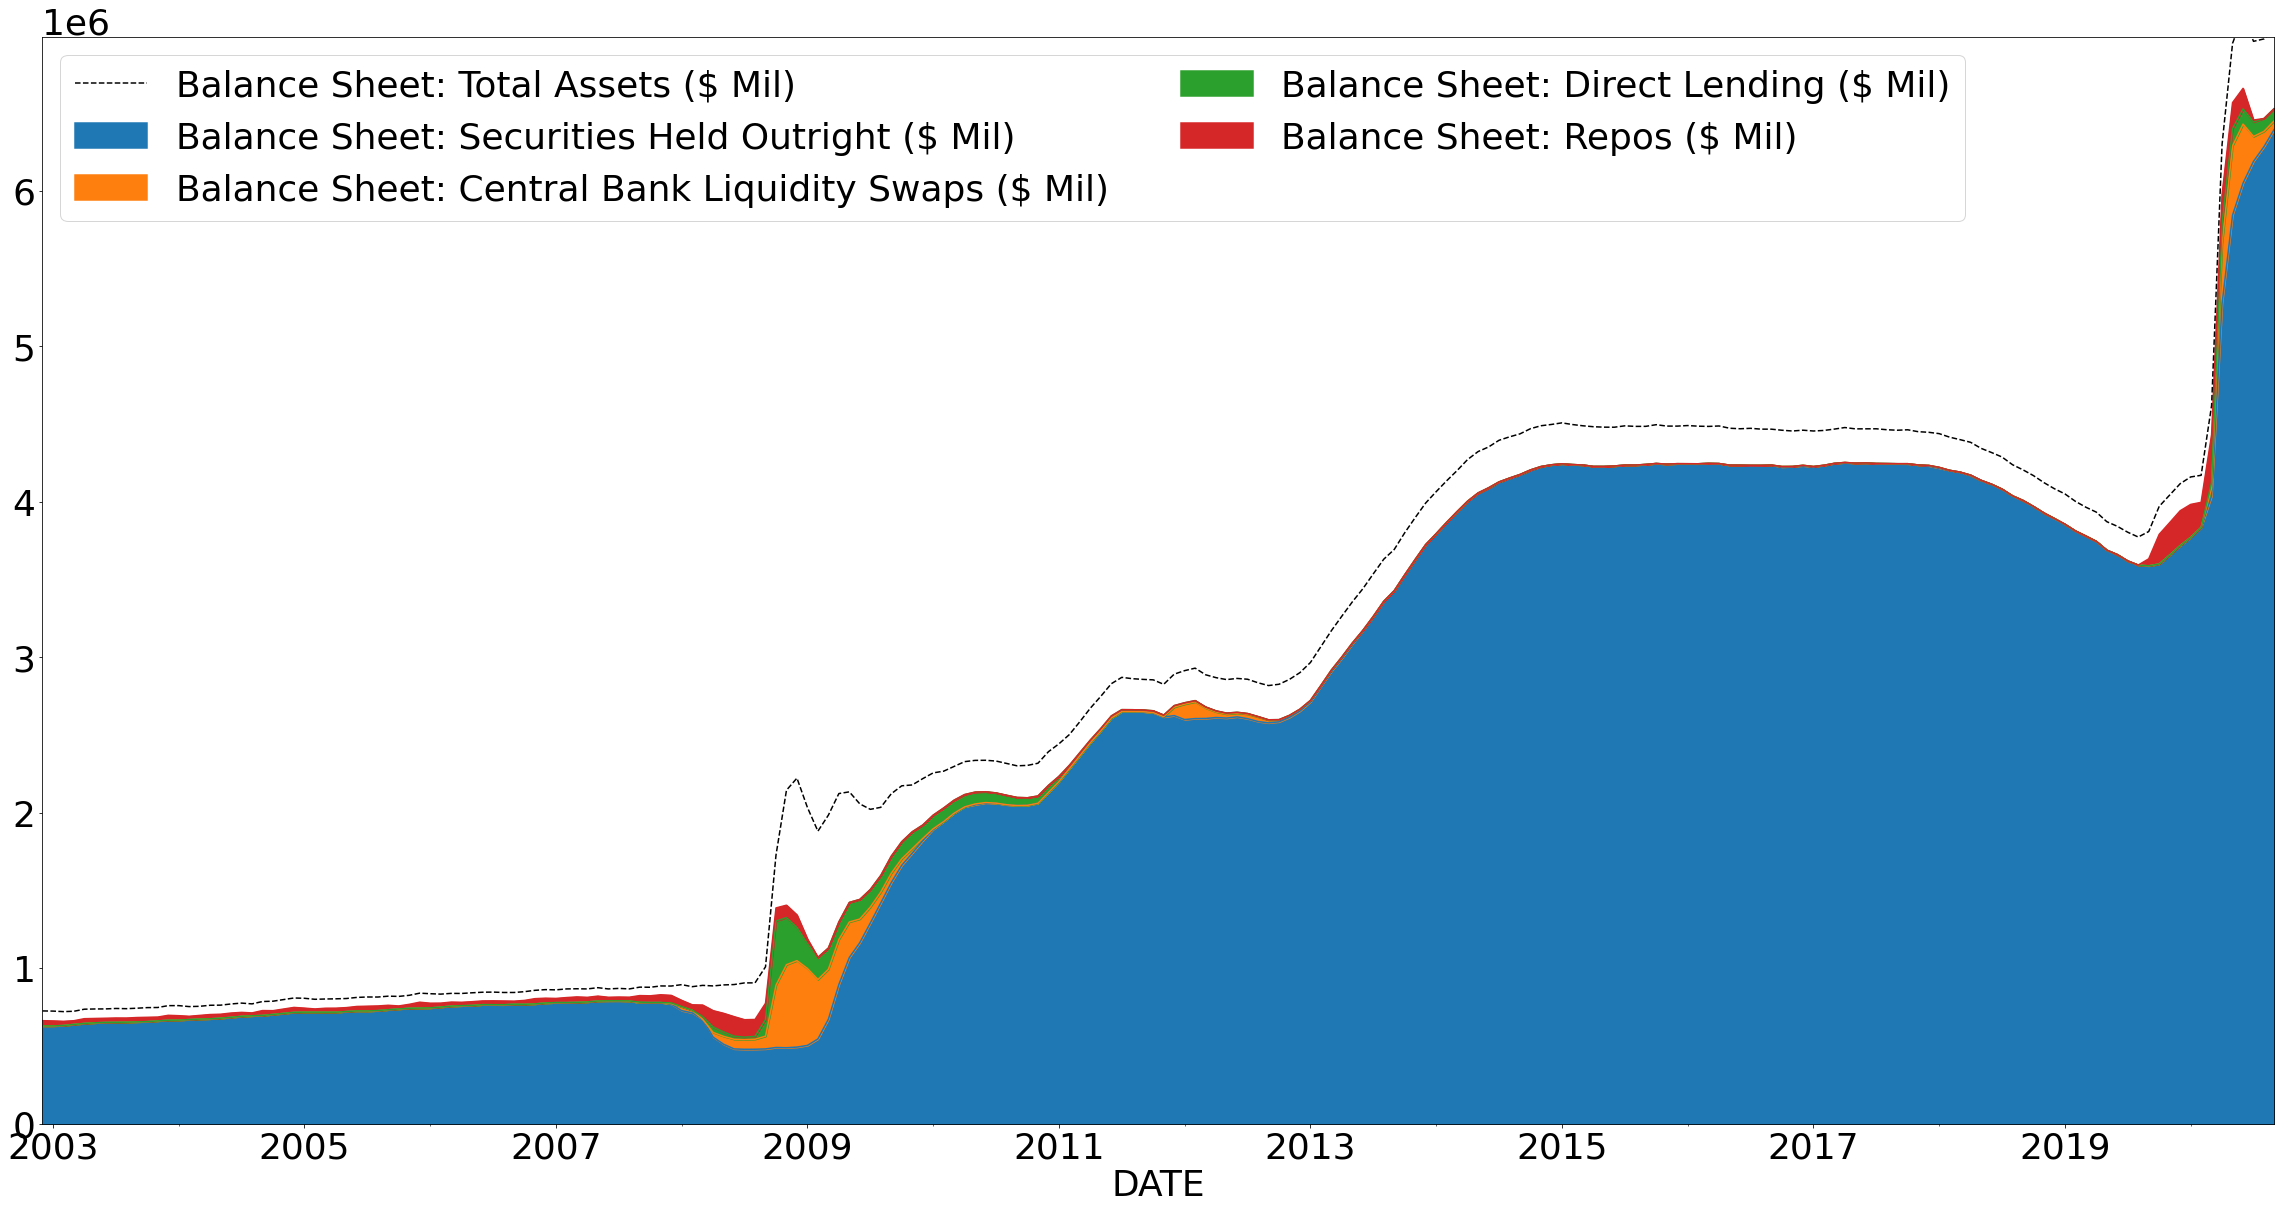

In [23]:
account_vars = ["Balance Sheet: Securities Held Outright ($ Mil)", "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)",
                "Balance Sheet: Direct Lending ($ Mil)", "Balance Sheet: Repos ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 1.5, 
                   total_var = "Balance Sheet: Total Assets ($ Mil)")

We see that securities held outright make up the overwhelming majority of the eds assets. That said, in periods of crisis, like 2008-2009 and 2020, the Federal Reserve's assets become more diverse.

# Liabilities of the Federal Reserve

We extend our analysis and look at the composition of the Federal Reserve's liabilities.

In the wake of the 2008 Financial Crisis, the Federal Reserve changed their monetary policy, making the interest earned on reserves as part of their policy toolkit. This caused increasing amounts of reserves to become held by the Fed.

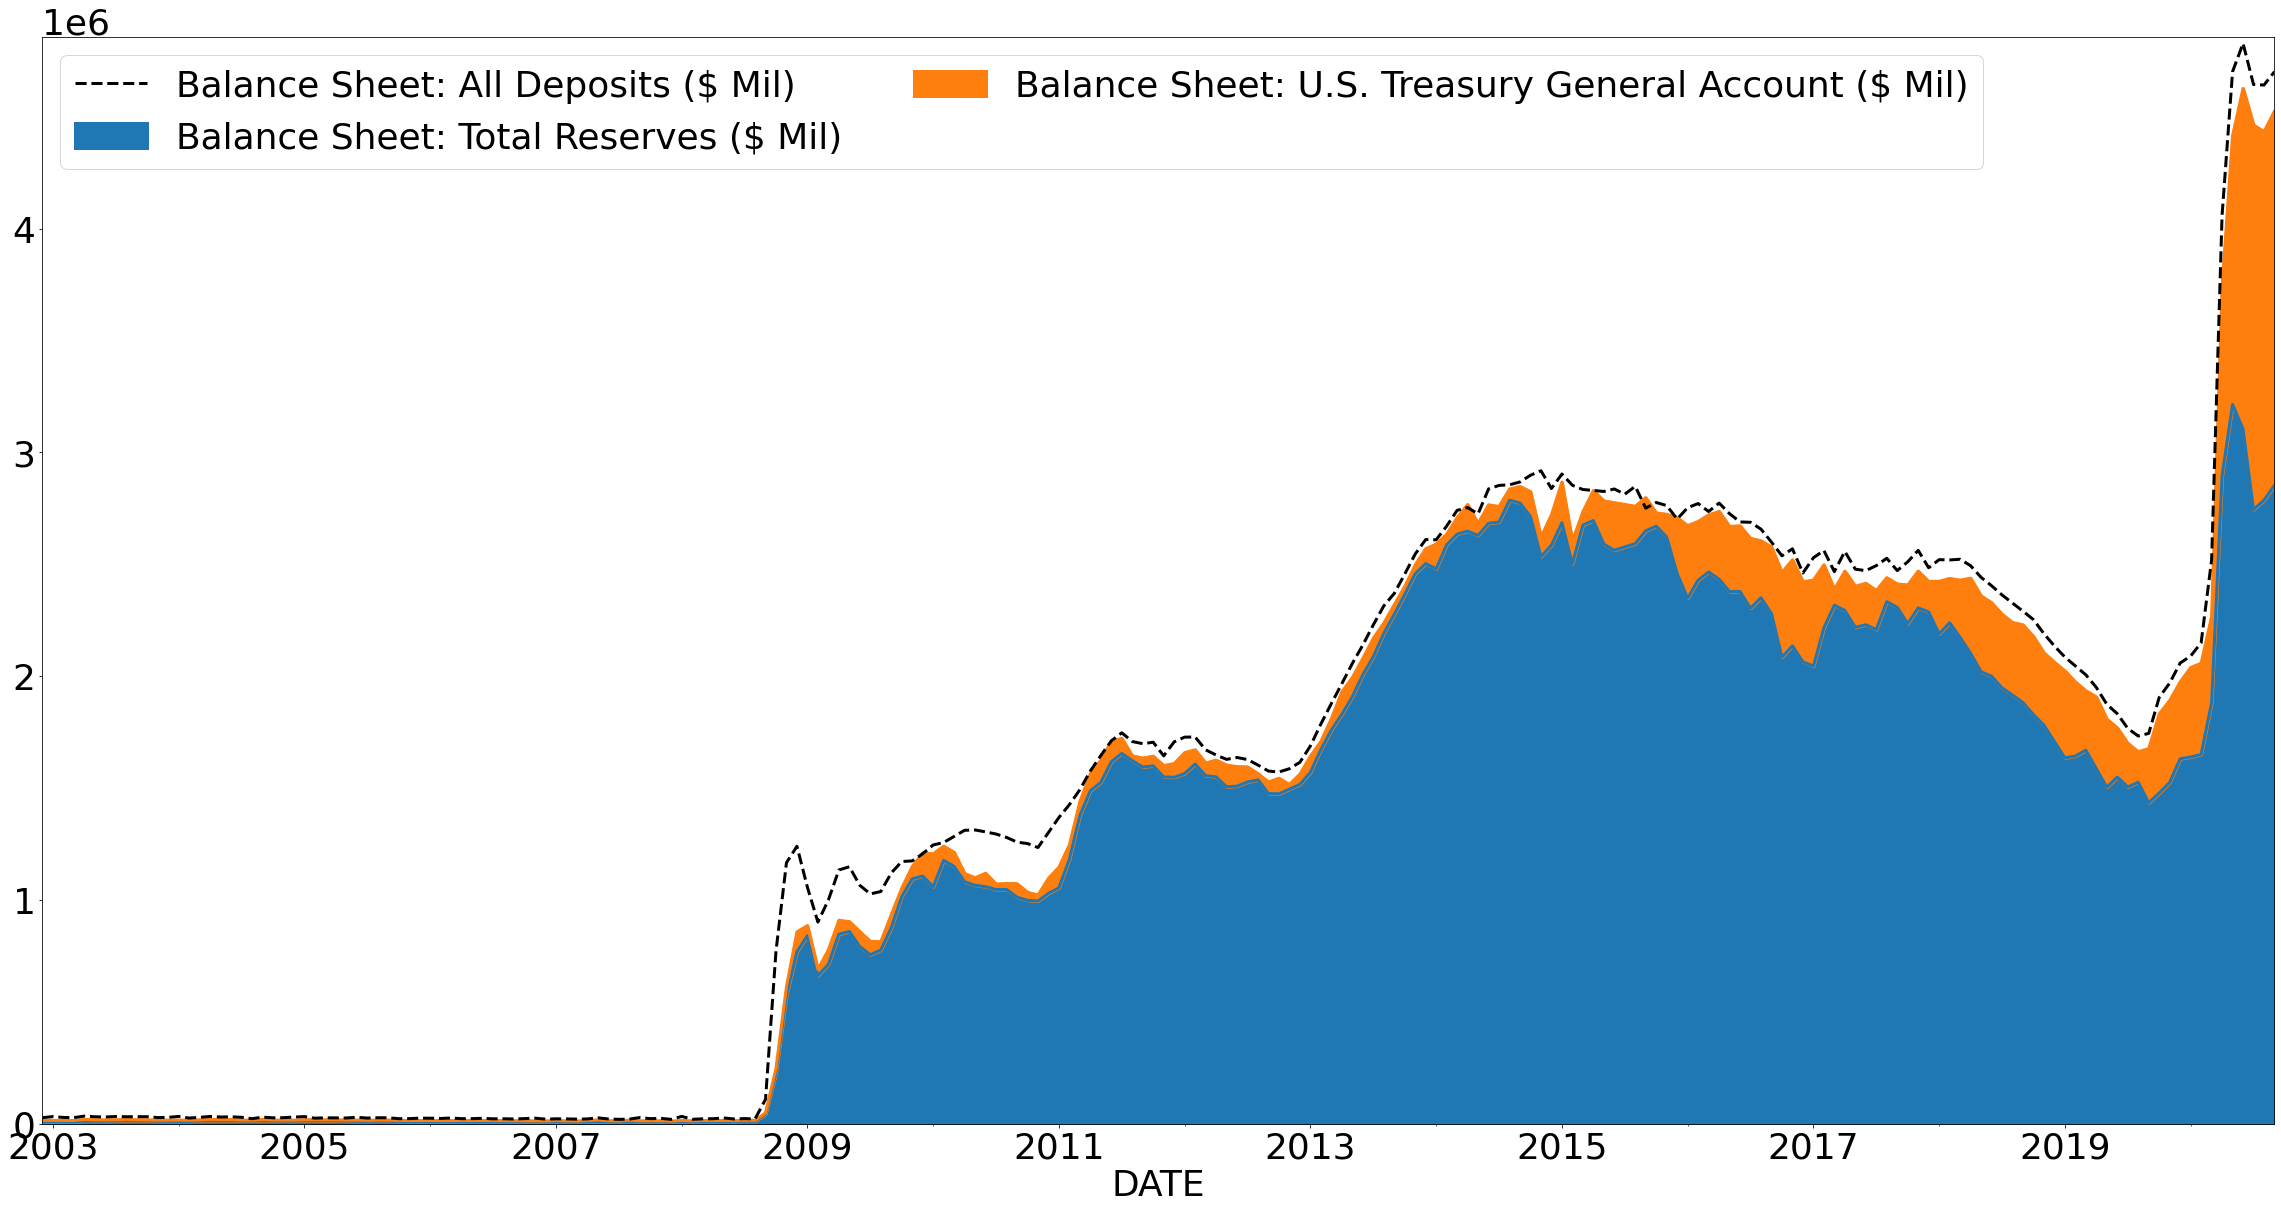

In [28]:
account_vars = ["Balance Sheet: Total Reserves ($ Mil)", "Balance Sheet: U.S. Treasury General Account ($ Mil)"]

plot_stacked_lines(data, account_vars, linewidth = 3, 
                   total_var = "Balance Sheet: All Deposits ($ Mil)")

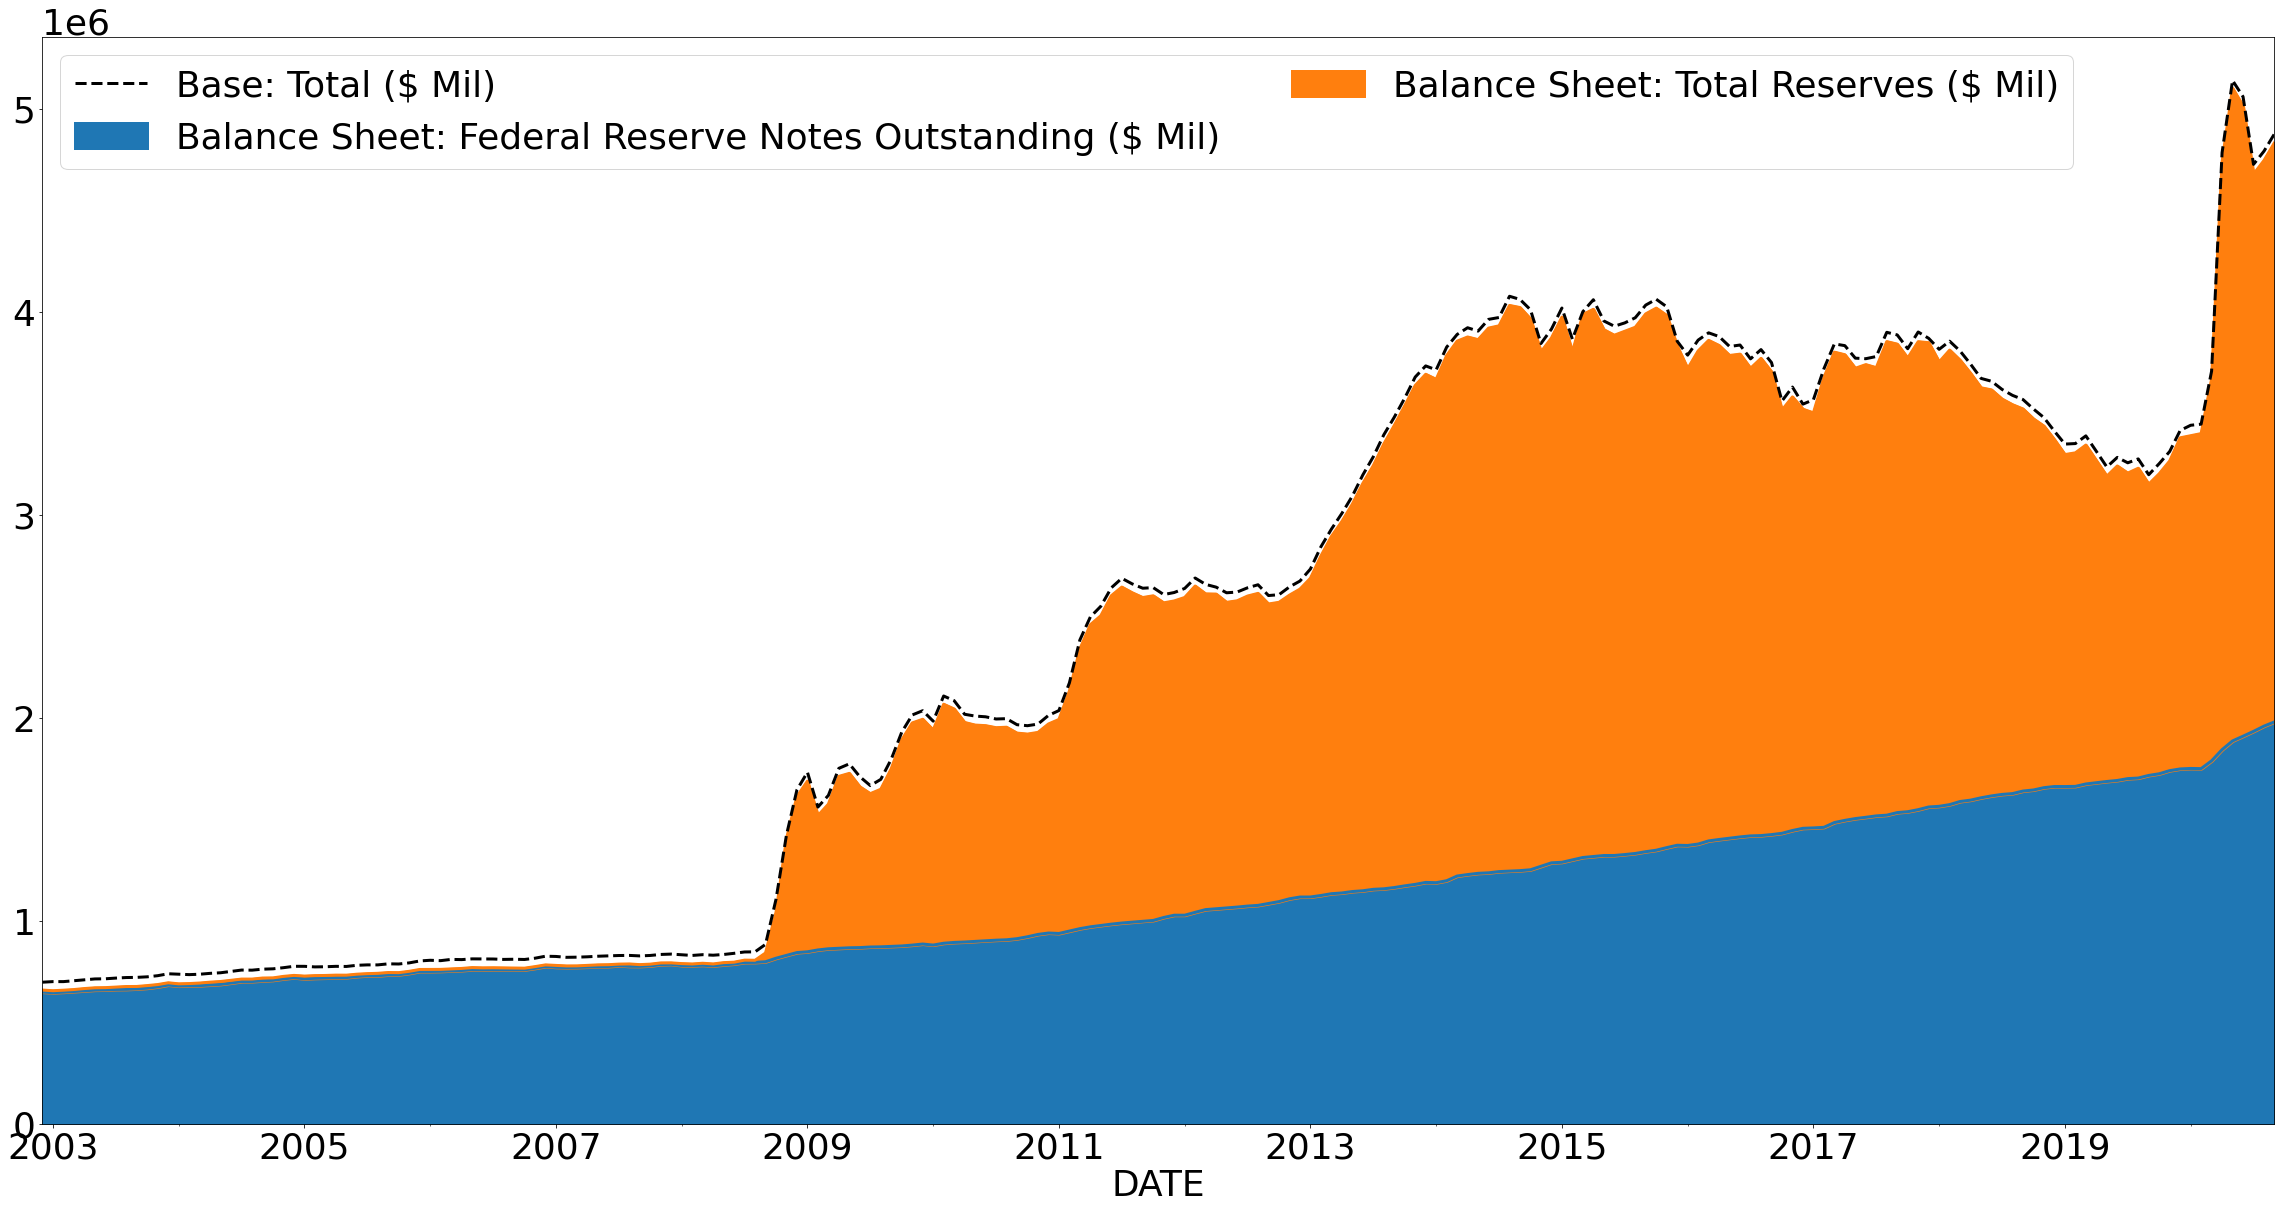

In [31]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)", "Balance Sheet: Total Reserves ($ Mil)"]
plot_stacked_lines(data, account_vars, linewidth = 3, total_var = "Base: Total ($ Mil)")

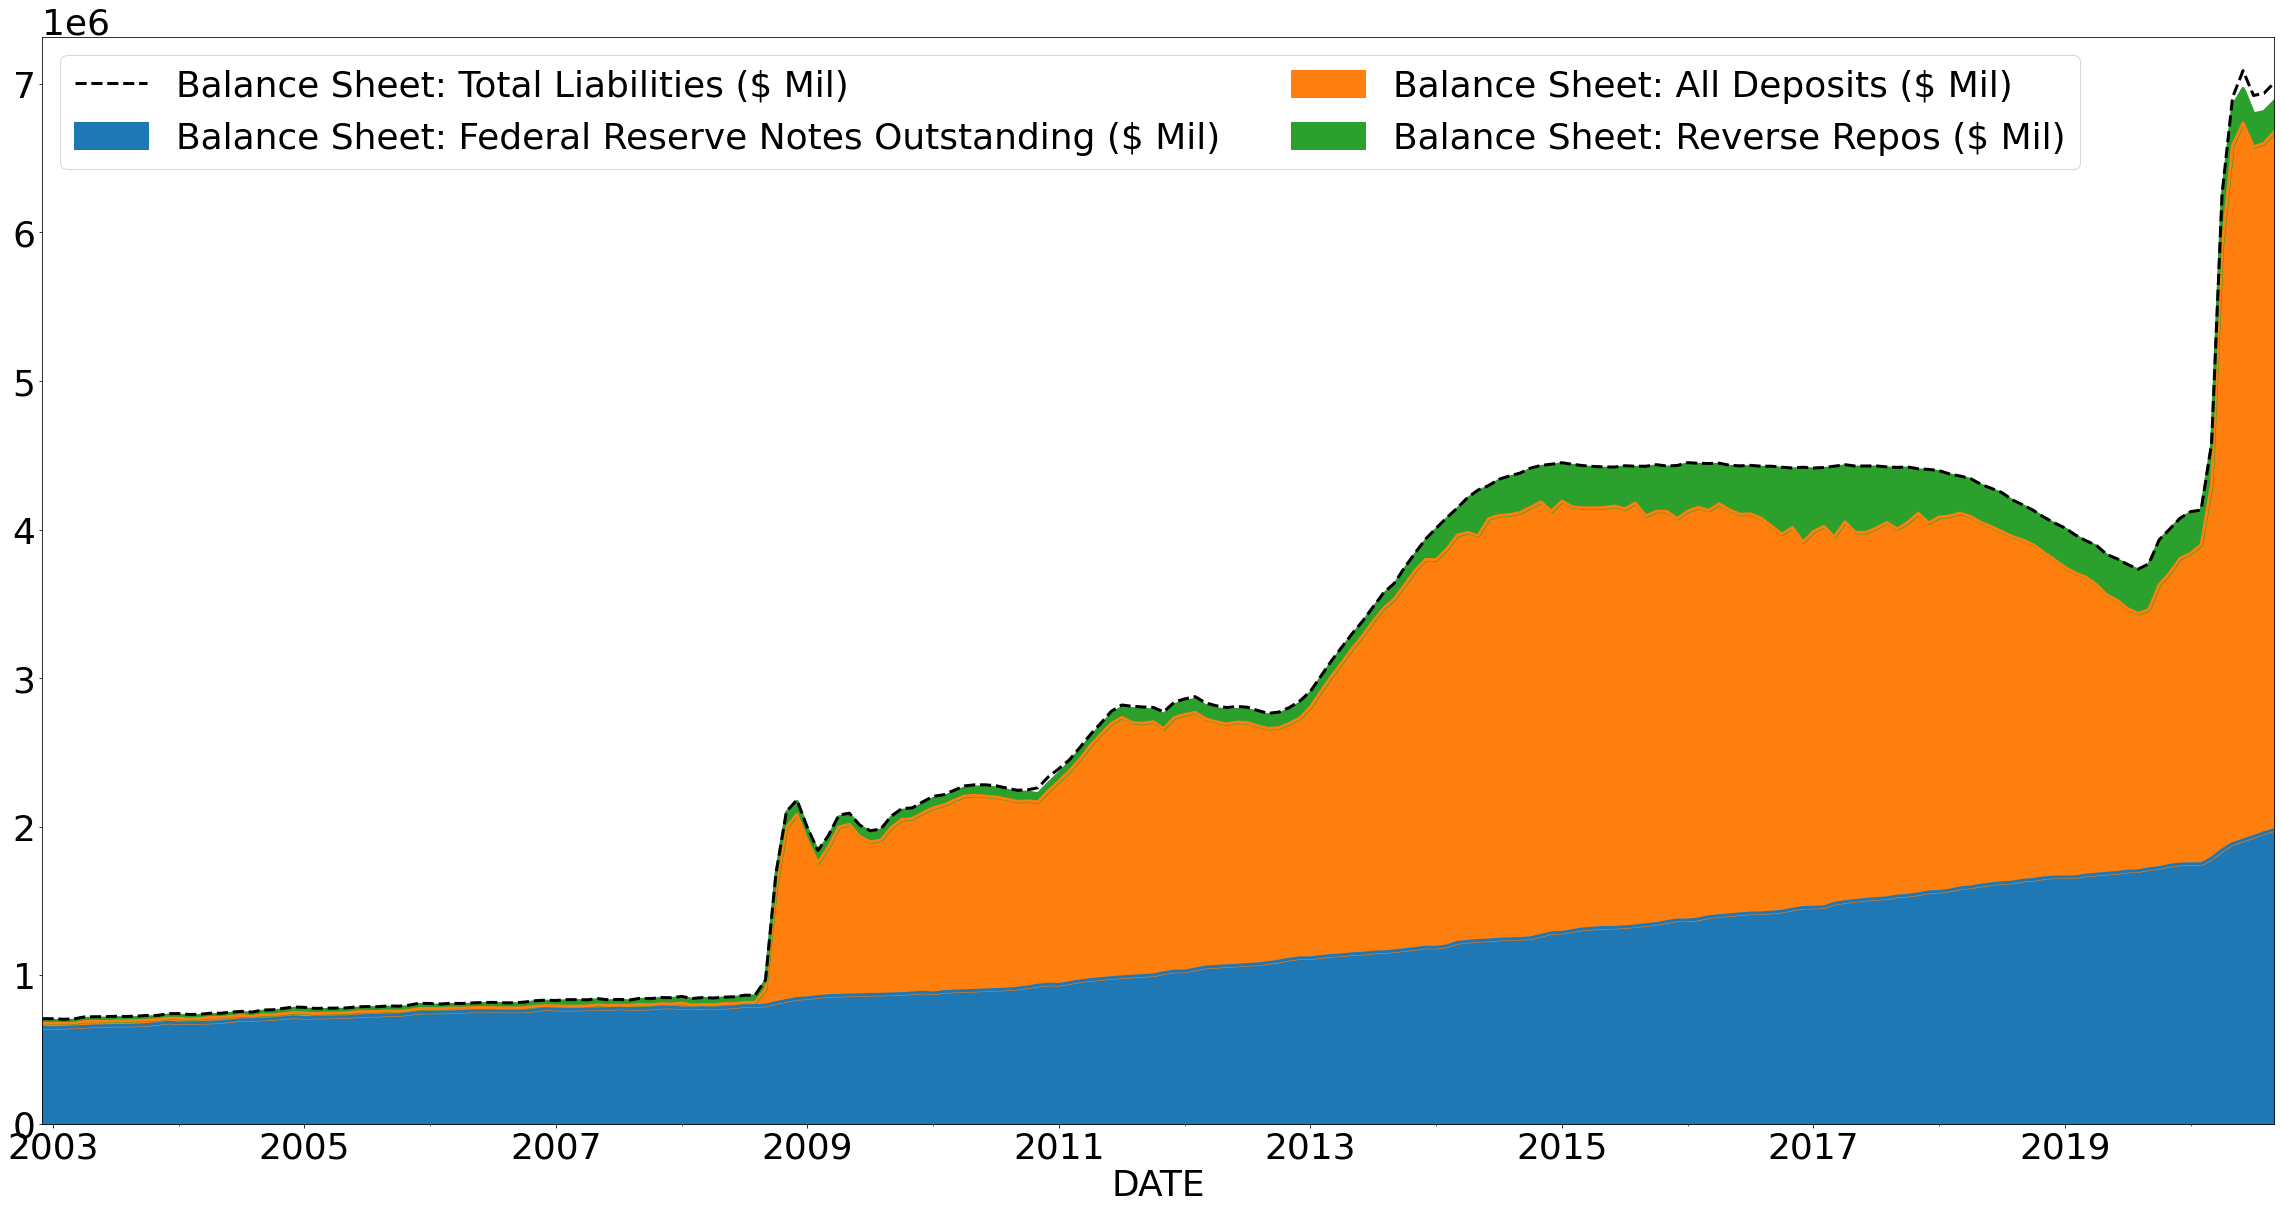

In [47]:
account_vars = ["Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)",
                "Balance Sheet: All Deposits ($ Mil)",
                "Balance Sheet: Reverse Repos ($ Mil)"]
plot_stacked_lines(data, account_vars, linewidth = 3,
                   total_var = "Balance Sheet: Total Liabilities ($ Mil)")

## The Federal Funds Rate

Let's see the effcts of the Fed in the Overnight lending market. We will do this by subtracting the reverse repos from the value of repos




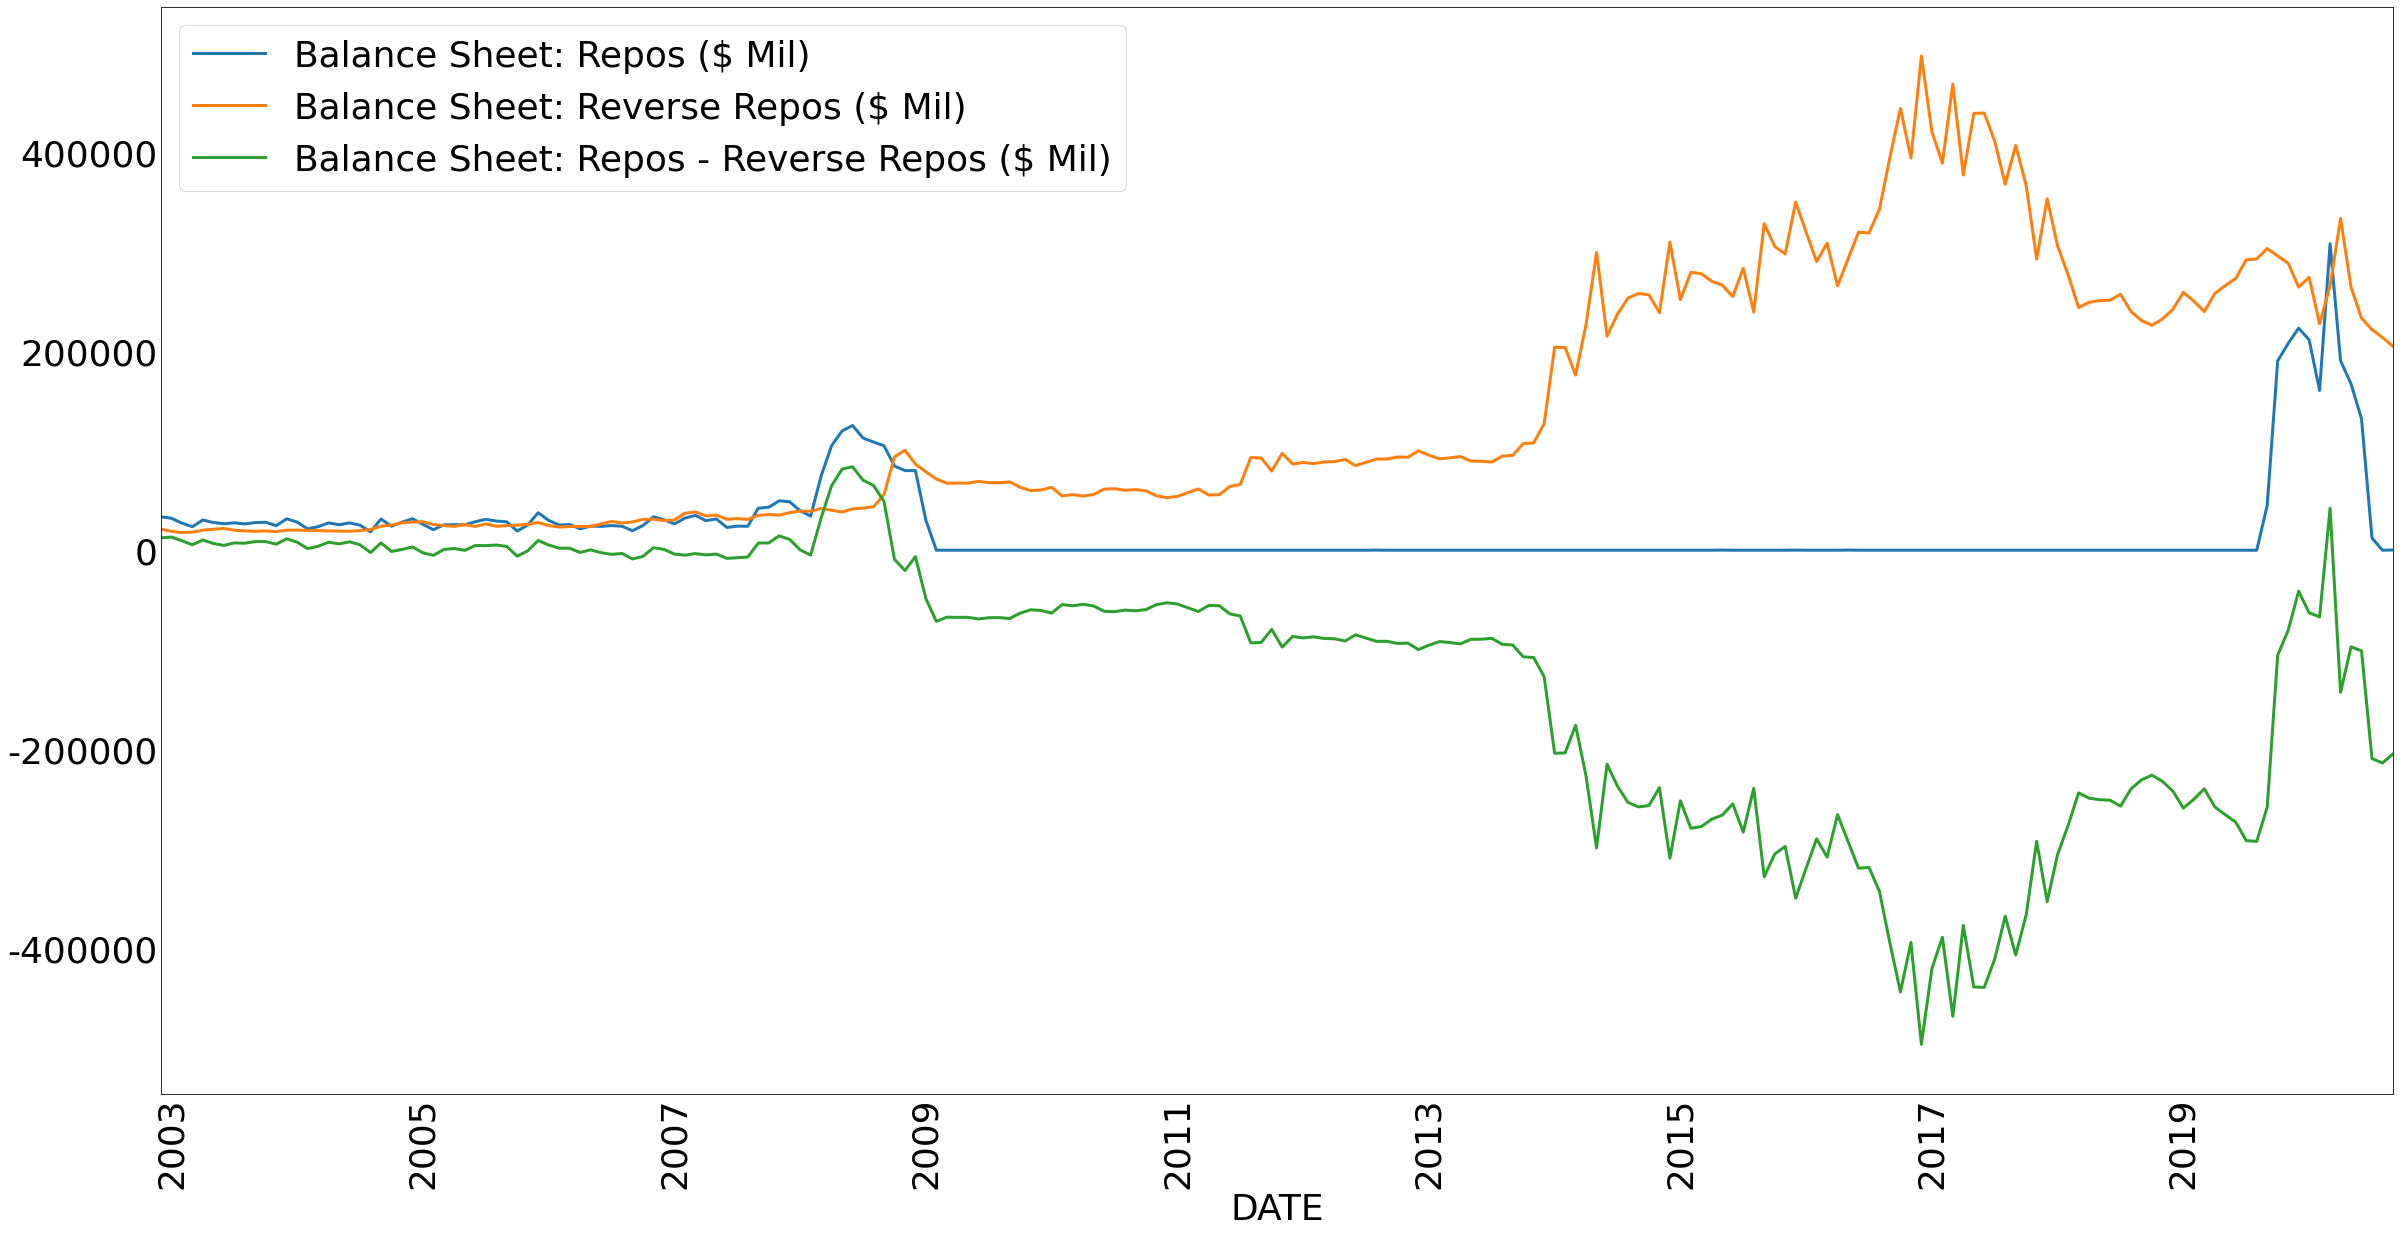

In [67]:


data["Balance Sheet: Repos - Reverse Repos ($ Mil)"] = data["Balance Sheet: Repos ($ Mil)"].sub(data["Balance Sheet: Reverse Repos ($ Mil)"])
overnight_vars = ["Balance Sheet: Repos ($ Mil)",
                 "Balance Sheet: Reverse Repos ($ Mil)",
                 "Balance Sheet: Repos - Reverse Repos ($ Mil)"]
plot_lines(data[overnight_vars], linewidth = 3)

After the 2008 Financial Crisis, the Federal Reserve

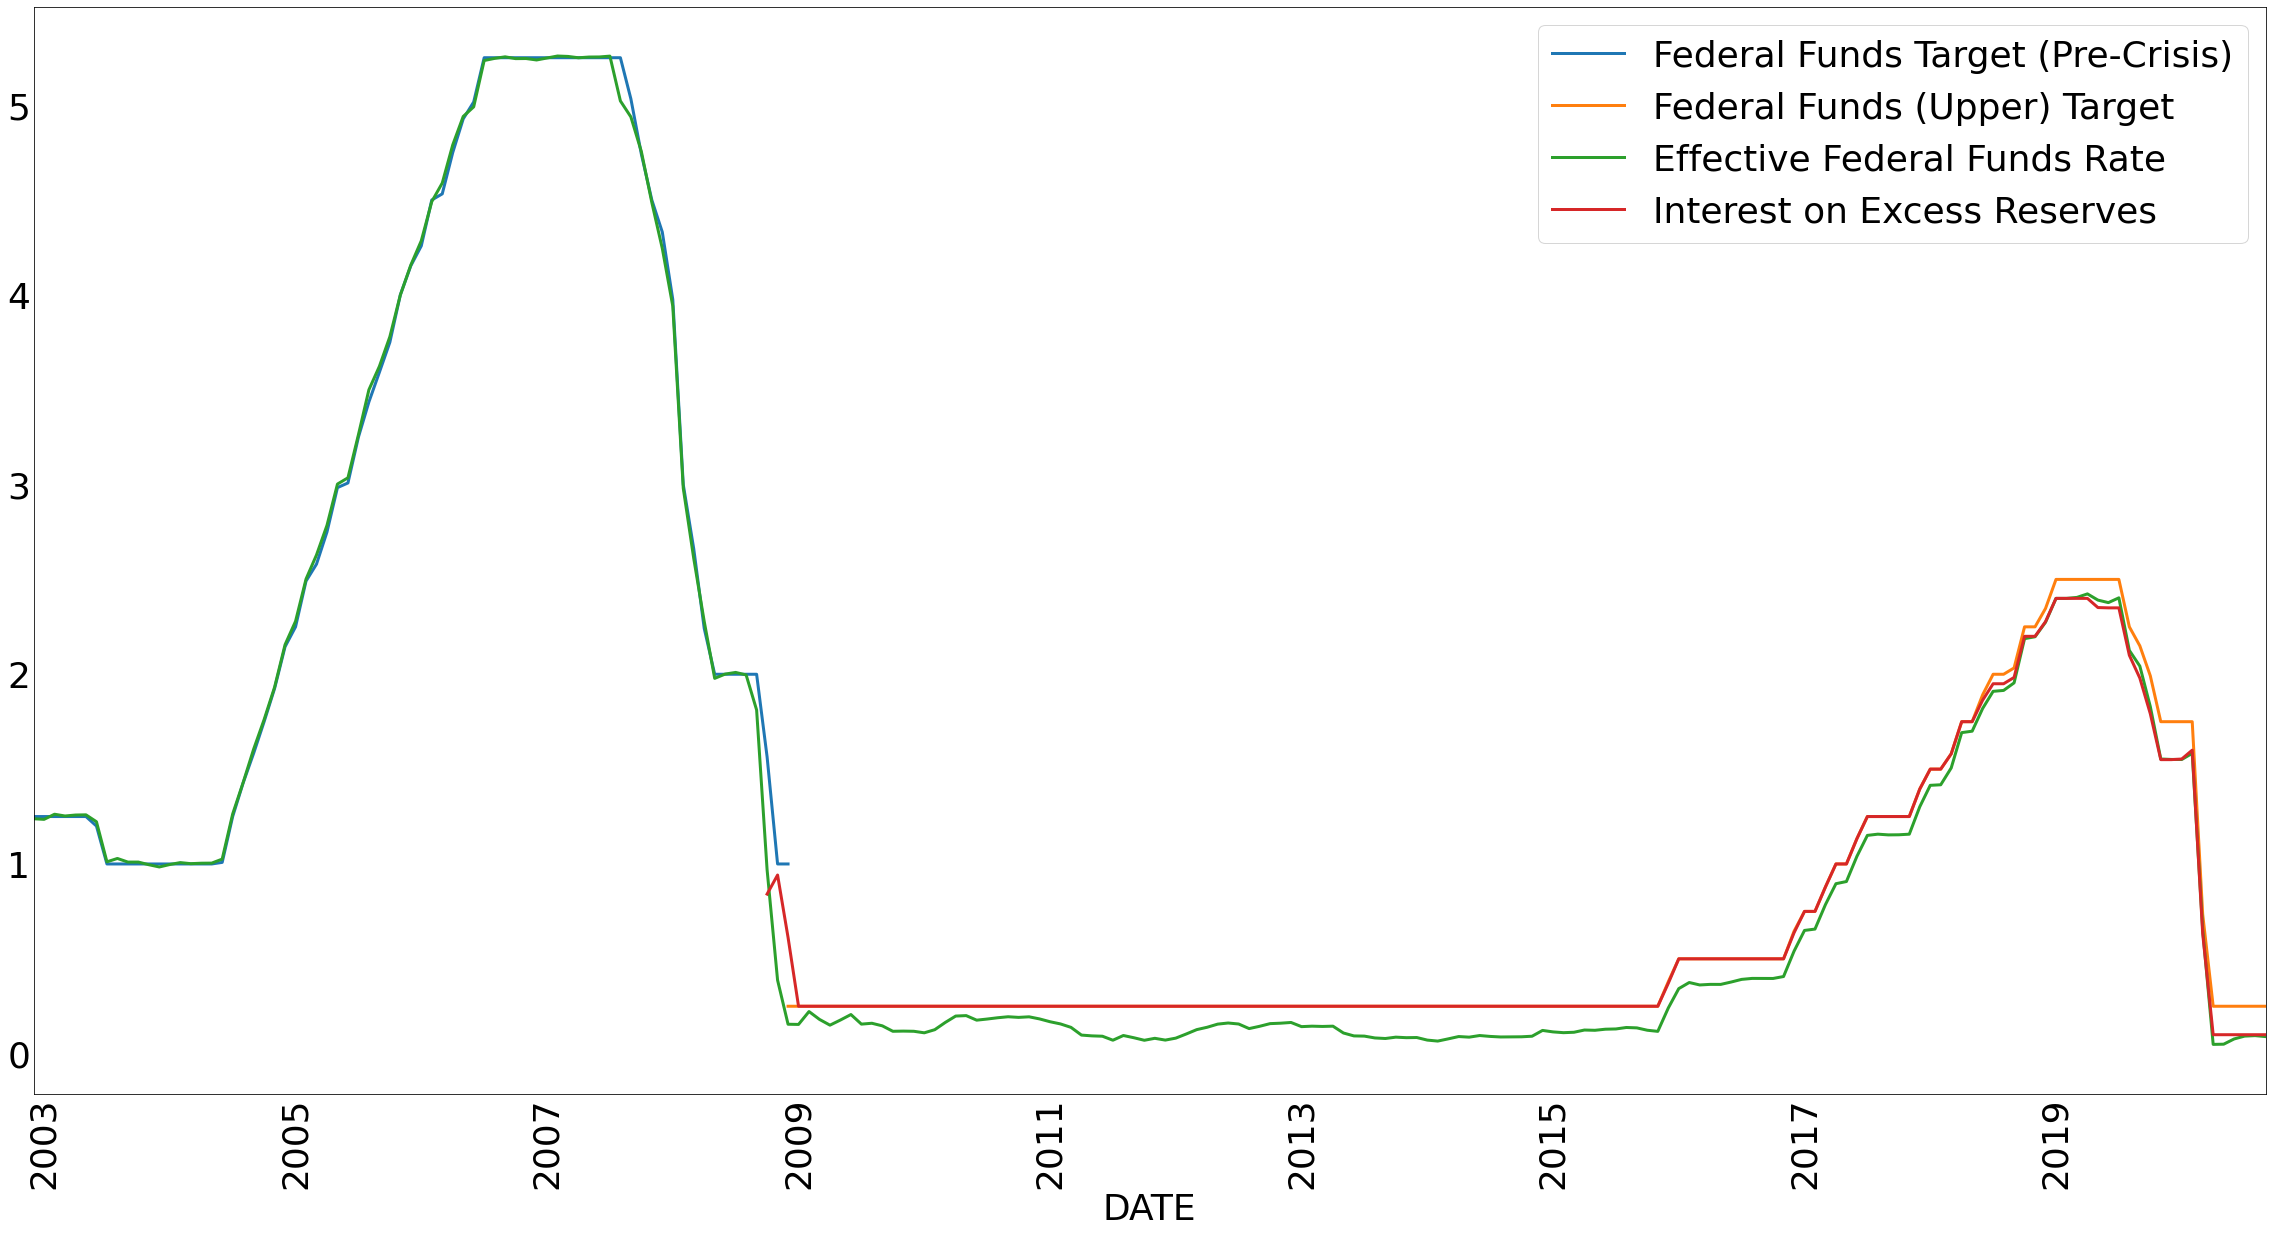

In [68]:
interest_vars = ["Federal Funds Target (Pre-Crisis)",
                "Federal Funds (Upper) Target",
                "Effective Federal Funds Rate",
                "Interest on Excess Reserves"]
plot_lines(data[interest_vars], linewidth = 3)